In [15]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt

df= pd.read_csv("output.csv", index_col=0)  # Keep index if it was saved
print(df.head())  # Display first few rows


      sasdate     GDPC1   PCECC96    PCDGx     PCESVx     PCNDx   GPDIC1  \
0  1959-03-01  3352.129  2039.017  68.6651  1374.1739  689.1172  354.894   
1  1959-06-01  3427.667  2070.508  71.2495  1394.7096  694.8197  382.500   
2  1959-09-01  3430.057  2092.138  72.6270  1413.6627  697.4699  357.798   
3  1959-12-01  3439.832  2094.495  69.1573  1430.8157  701.7617  369.442   
4  1960-03-01  3517.181  2114.532  71.3815  1443.7405  703.5338  406.581   

       FPIx  Y033RC1Q027SBEAx     PNFIx  ...     BCIUSA  index   FCTAX  \
0  357.0174           47.8021  171.0783  ...  102.47640    0.0  21.573   
1  368.0640           49.2332  176.0004  ...  103.19420    1.0  21.573   
2  371.9585           50.8372  180.7406  ...  101.52760    2.0  21.573   
3  367.6452           50.7342  180.2333  ...   99.43076    3.0  21.573   
4  379.9162           52.4985  186.4967  ...  100.81220    4.0  20.550   

   observation_date  B230RC0Q173SBEA  NETEXP   modelled_C  modelled_I  \
0        1959-01-01      

      sasdate     GDPC1   PCECC96    PCDGx     PCESVx     PCNDx   GPDIC1  \
0  1959-03-01  3352.129  2039.017  68.6651  1374.1739  689.1172  354.894   
1  1959-06-01  3427.667  2070.508  71.2495  1394.7096  694.8197  382.500   
2  1959-09-01  3430.057  2092.138  72.6270  1413.6627  697.4699  357.798   
3  1959-12-01  3439.832  2094.495  69.1573  1430.8157  701.7617  369.442   
4  1960-03-01  3517.181  2114.532  71.3815  1443.7405  703.5338  406.581   

       FPIx  Y033RC1Q027SBEAx     PNFIx  ...     BCIUSA  index   FCTAX  \
0  357.0174           47.8021  171.0783  ...  102.47640    0.0  21.573   
1  368.0640           49.2332  176.0004  ...  103.19420    1.0  21.573   
2  371.9585           50.8372  180.7406  ...  101.52760    2.0  21.573   
3  367.6452           50.7342  180.2333  ...   99.43076    3.0  21.573   
4  379.9162           52.4985  186.4967  ...  100.81220    4.0  20.550   

   observation_date  B230RC0Q173SBEA  NETEXP   modelled_C  modelled_I  \
0        1959-01-01      

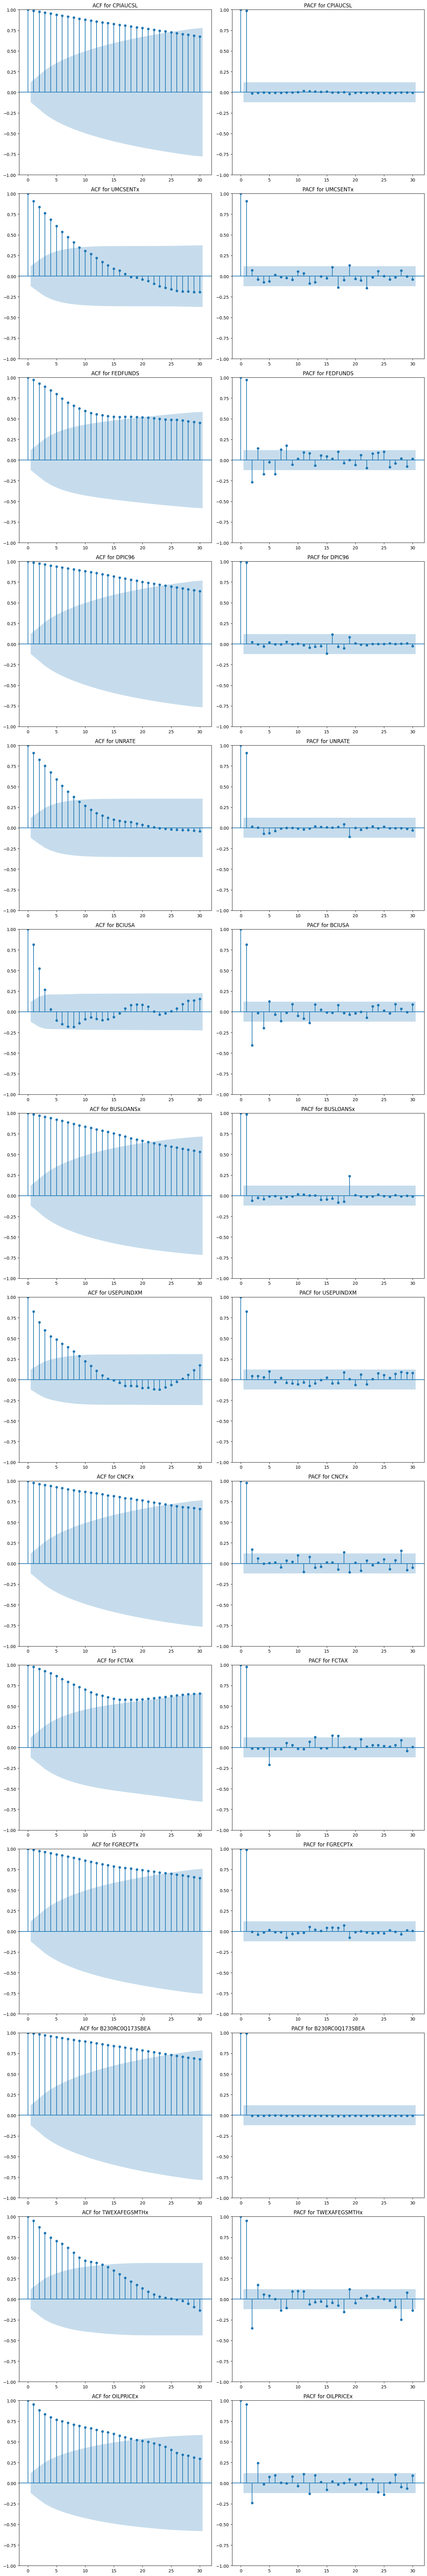

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

print(df.head())
# List of underlying variables to analyze
underlying_vars = [
    'CPIAUCSL', 'UMCSENTx', 'FEDFUNDS', 'DPIC96', 'UNRATE',
    'BCIUSA', 'BUSLOANSx', 'USEPUINDXM', 'CNCFx', 'FCTAX',
    'FGRECPTx', 'B230RC0Q173SBEA', 'TWEXAFEGSMTHx', 'OILPRICEx'
]

# Create subplots for ACF and PACF
fig, axes = plt.subplots(len(underlying_vars), 2, figsize=(14, 6 * len(underlying_vars)))

# Loop through the variables and plot ACF and PACF
for i, var in enumerate(underlying_vars):
    series = df[var].dropna()  # Drop missing values for each variable

    # Perform ADF test for stationarity
    result = adfuller(series)
    print(f"ADF Statistic for {var}: {result[0]}")
    print(f"p-value: {result[1]}")

    # ACF Plot
    plot_acf(series, lags=30, ax=axes[i][0])
    axes[i][0].set_title(f'ACF for {var}')

    # PACF Plot
    plot_pacf(series, lags=30, ax=axes[i][1])
    axes[i][1].set_title(f'PACF for {var}')

# Display plots
plt.tight_layout()
plt.show()

Training model for CPIAUCSL...


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/27_neakw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/555rcn8v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59901', 'data', 'file=/tmp/tmp7bjhn3le/27_neakw.json', 'init=/tmp/tmp7bjhn3le/555rcn8v.json', 'output', 'file=/tmp/tmp7bjhn3le/prophet_modelqmdbylk7/prophet_model-20250212091402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:14:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


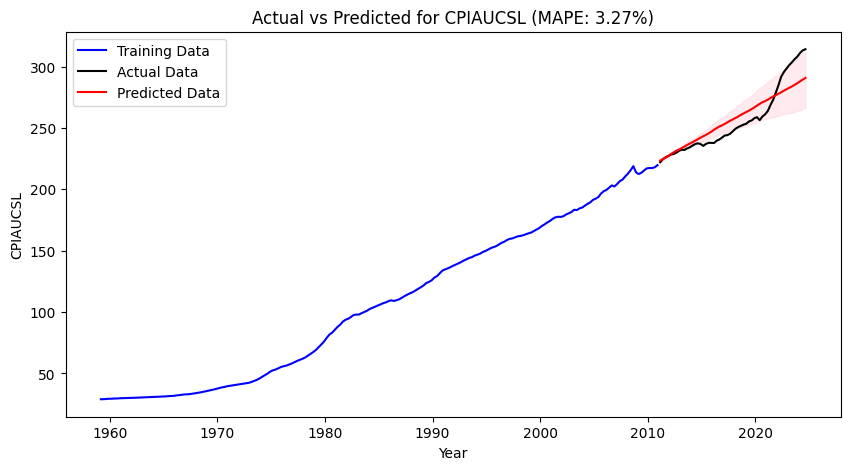

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/63s3vhgq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/9ikwps1f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84262', 'data', 'file=/tmp/tmp7bjhn3le/63s3vhgq.json', 'init=/tmp/tmp7bjhn3le/9ikwps1f.json', 'output', 'file=/tmp/tmp7bjhn3le/prophet_modelgdiy8i5q/prophet_model-20250212091403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:14:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for UMCSENTx...


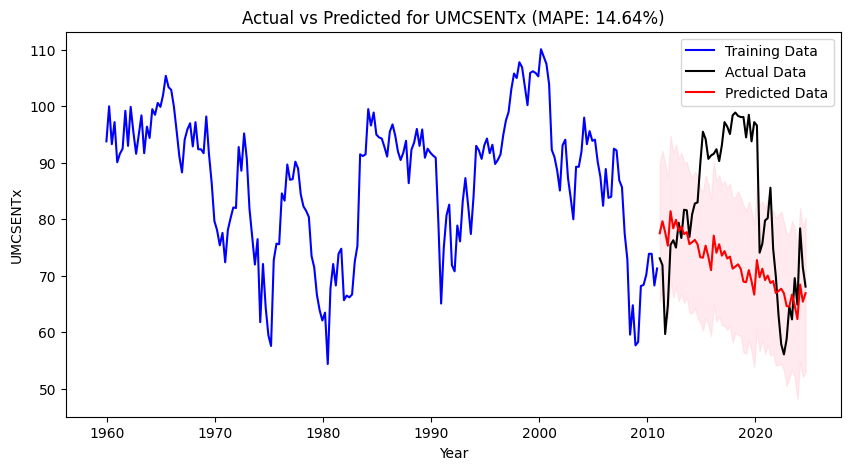

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/8dnhif_c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/u6s8h601.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67921', 'data', 'file=/tmp/tmp7bjhn3le/8dnhif_c.json', 'init=/tmp/tmp7bjhn3le/u6s8h601.json', 'output', 'file=/tmp/tmp7bjhn3le/prophet_model4yg9qzs3/prophet_model-20250212091403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:14:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for FEDFUNDS...


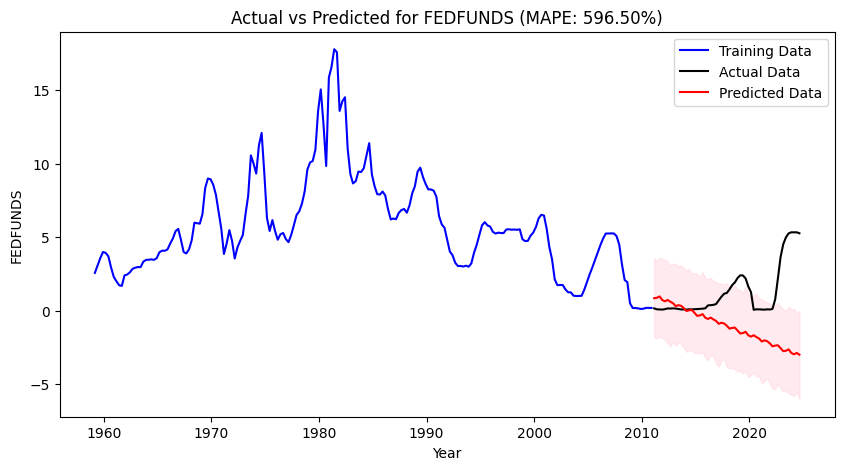

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/c5xniq3s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/ps70ofed.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74221', 'data', 'file=/tmp/tmp7bjhn3le/c5xniq3s.json', 'init=/tmp/tmp7bjhn3le/ps70ofed.json', 'output', 'file=/tmp/tmp7bjhn3le/prophet_modeln71hckpp/prophet_model-20250212091404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:14:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for DPIC96...


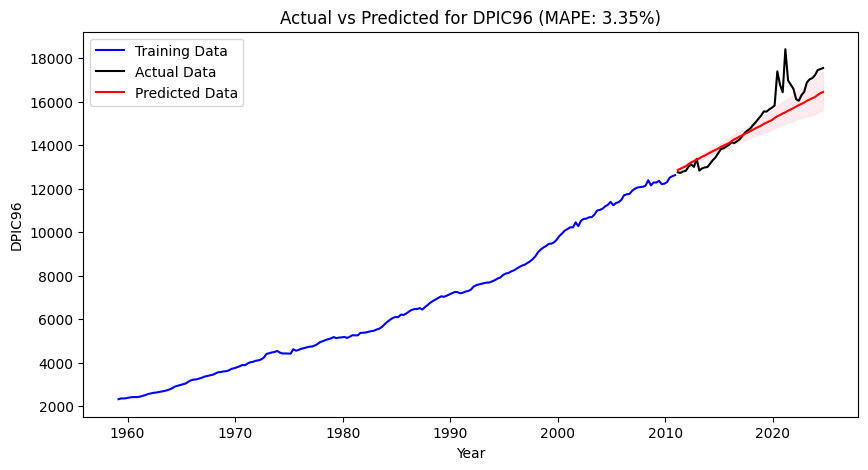

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/oosr86ba.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/aaeqz70k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40136', 'data', 'file=/tmp/tmp7bjhn3le/oosr86ba.json', 'init=/tmp/tmp7bjhn3le/aaeqz70k.json', 'output', 'file=/tmp/tmp7bjhn3le/prophet_modelx017vslh/prophet_model-20250212091404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:14:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for UNRATE...


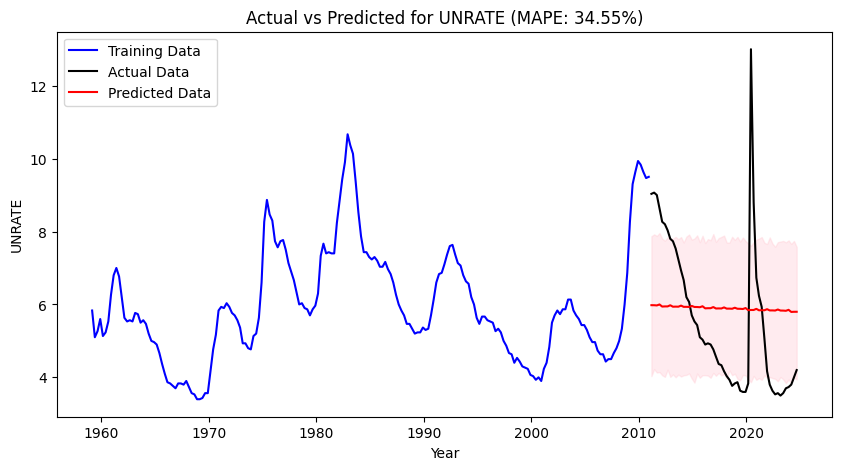

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/9m8uv5xu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/_vapd0fs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60594', 'data', 'file=/tmp/tmp7bjhn3le/9m8uv5xu.json', 'init=/tmp/tmp7bjhn3le/_vapd0fs.json', 'output', 'file=/tmp/tmp7bjhn3le/prophet_modelgcoi0vnj/prophet_model-20250212091405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:14:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for BCIUSA...


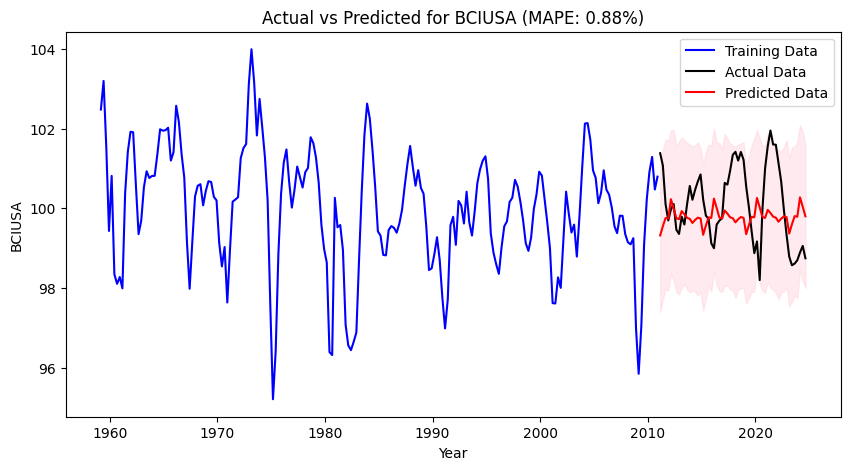

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/al7szqsw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/9oyeow7g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77816', 'data', 'file=/tmp/tmp7bjhn3le/al7szqsw.json', 'init=/tmp/tmp7bjhn3le/9oyeow7g.json', 'output', 'file=/tmp/tmp7bjhn3le/prophet_modela9fucrc5/prophet_model-20250212091405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:14:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for BUSLOANSx...


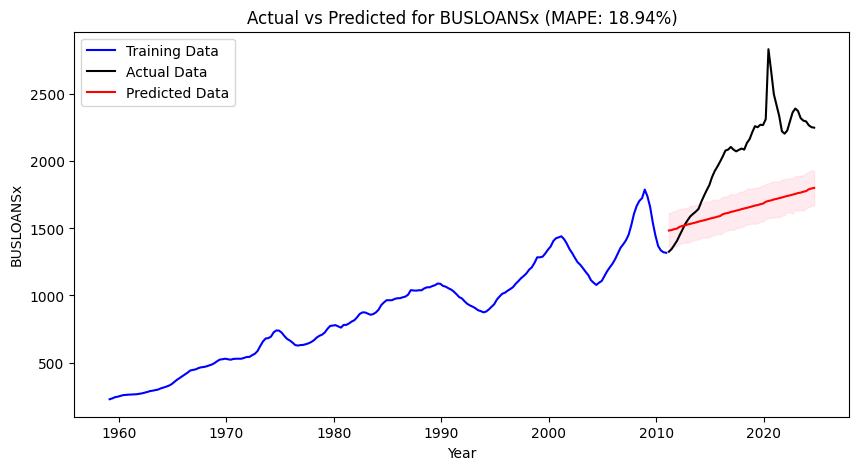

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/daje1m58.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/p96y_b8v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96989', 'data', 'file=/tmp/tmp7bjhn3le/daje1m58.json', 'init=/tmp/tmp7bjhn3le/p96y_b8v.json', 'output', 'file=/tmp/tmp7bjhn3le/prophet_modeluchtqf92/prophet_model-20250212091406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:14:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for USEPUINDXM...


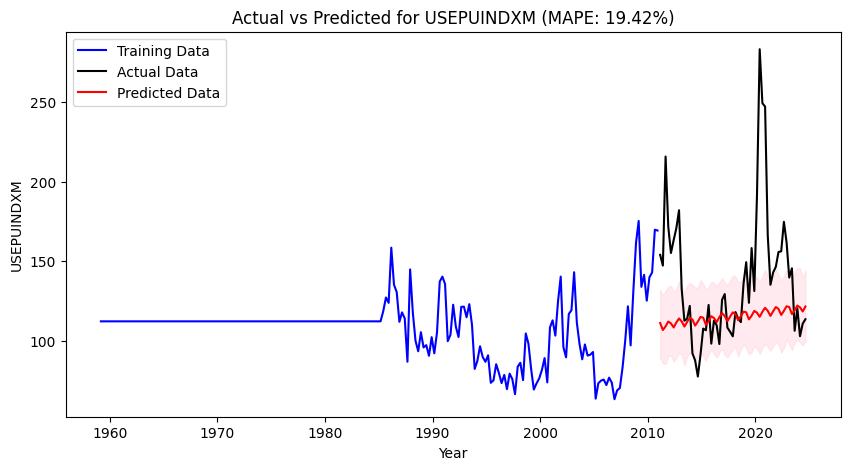

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/gi6kv0hr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/hwdbomkd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74998', 'data', 'file=/tmp/tmp7bjhn3le/gi6kv0hr.json', 'init=/tmp/tmp7bjhn3le/hwdbomkd.json', 'output', 'file=/tmp/tmp7bjhn3le/prophet_model7sm0v6zo/prophet_model-20250212091407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:14:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for CNCFx...


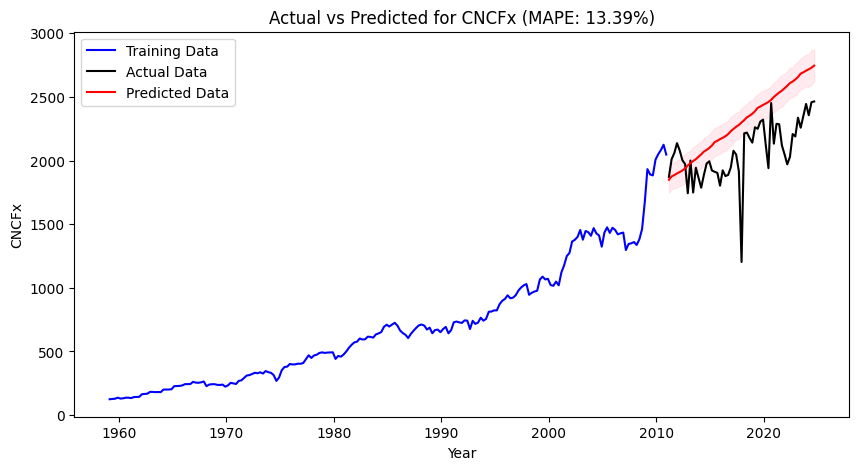

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/fw7whb78.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/ntwozi17.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84696', 'data', 'file=/tmp/tmp7bjhn3le/fw7whb78.json', 'init=/tmp/tmp7bjhn3le/ntwozi17.json', 'output', 'file=/tmp/tmp7bjhn3le/prophet_modelt_47w1m2/prophet_model-20250212091407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:14:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for FCTAX...


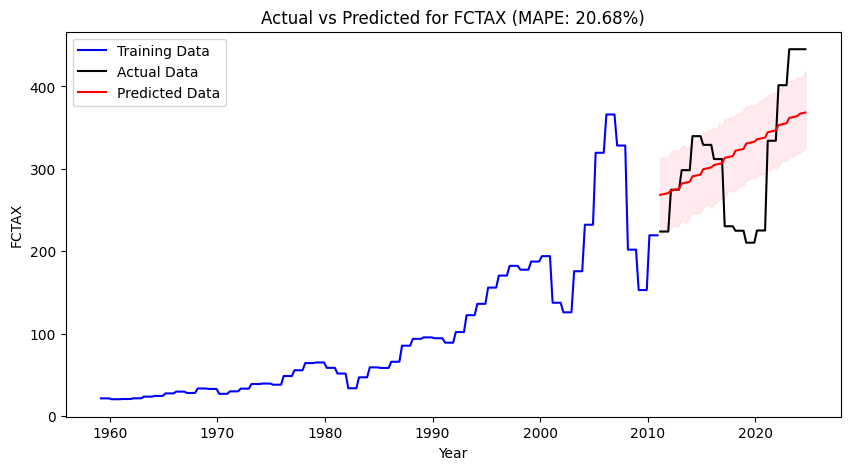

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/ov78cs0e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/qab851gs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36589', 'data', 'file=/tmp/tmp7bjhn3le/ov78cs0e.json', 'init=/tmp/tmp7bjhn3le/qab851gs.json', 'output', 'file=/tmp/tmp7bjhn3le/prophet_modeltwwn0ve0/prophet_model-20250212091408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:14:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for FGRECPTx...


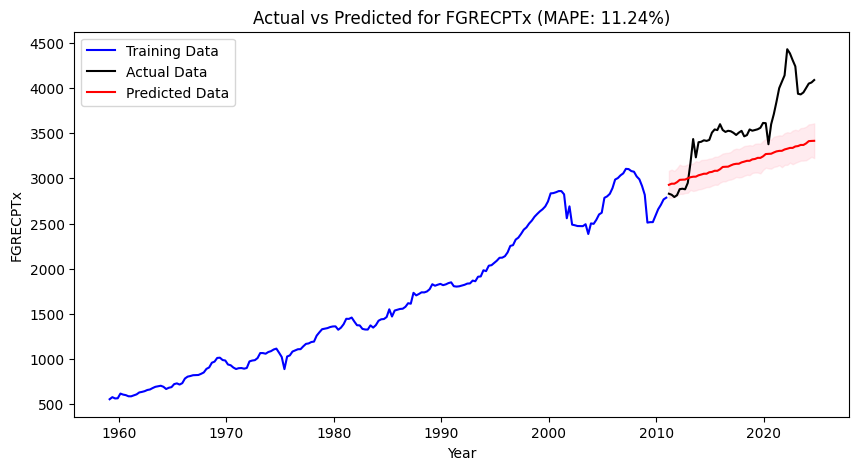

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/emegwsxp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/tdr9tzv9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65383', 'data', 'file=/tmp/tmp7bjhn3le/emegwsxp.json', 'init=/tmp/tmp7bjhn3le/tdr9tzv9.json', 'output', 'file=/tmp/tmp7bjhn3le/prophet_model0aeouhng/prophet_model-20250212091409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for B230RC0Q173SBEA...


09:14:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


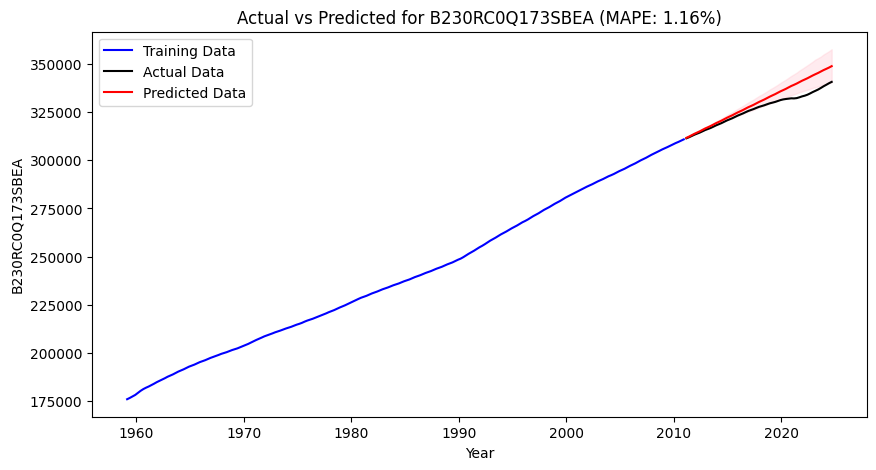

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/5m7524ja.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/q0hweyu4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38362', 'data', 'file=/tmp/tmp7bjhn3le/5m7524ja.json', 'init=/tmp/tmp7bjhn3le/q0hweyu4.json', 'output', 'file=/tmp/tmp7bjhn3le/prophet_modelft612i4p/prophet_model-20250212091410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:14:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for TWEXAFEGSMTHx...


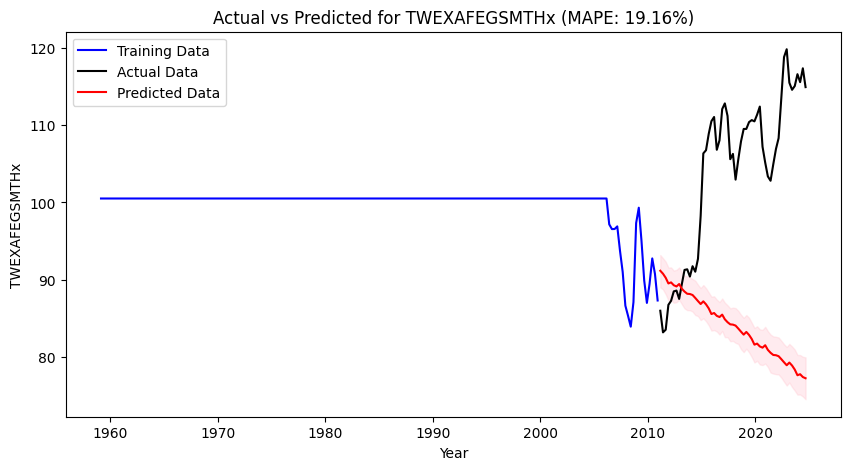

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/2nslmavj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bjhn3le/7k0833k5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57763', 'data', 'file=/tmp/tmp7bjhn3le/2nslmavj.json', 'init=/tmp/tmp7bjhn3le/7k0833k5.json', 'output', 'file=/tmp/tmp7bjhn3le/prophet_modeli0f5etyv/prophet_model-20250212091410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:14:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for OILPRICEx...


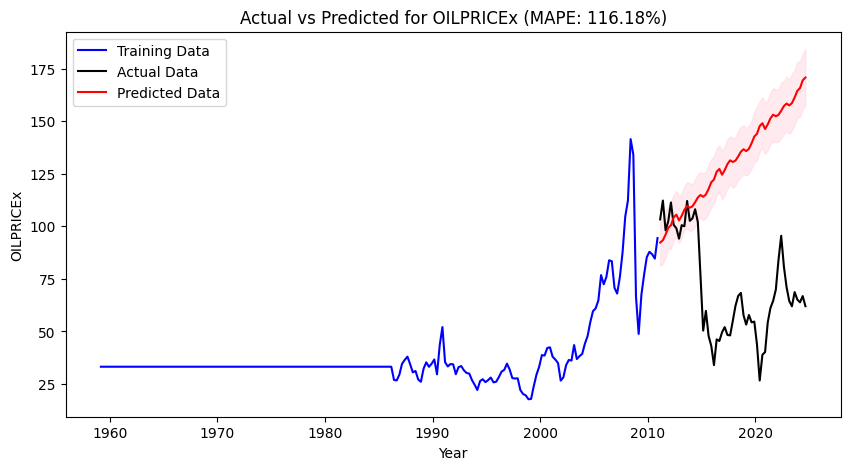


MAPE Scores:
CPIAUCSL: 3.27%
UMCSENTx: 14.64%
FEDFUNDS: 596.50%
DPIC96: 3.35%
UNRATE: 34.55%
BCIUSA: 0.88%
BUSLOANSx: 18.94%
USEPUINDXM: 19.42%
CNCFx: 13.39%
FCTAX: 20.68%
FGRECPTx: 11.24%
B230RC0Q173SBEA: 1.16%
TWEXAFEGSMTHx: 19.16%
OILPRICEx: 116.18%


In [17]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

df["sasdate"] = pd.to_datetime(df["sasdate"])


# List of variables to model
variables = [
    "CPIAUCSL", "UMCSENTx", "FEDFUNDS", "DPIC96", "UNRATE", "BCIUSA",
    "BUSLOANSx", "USEPUINDXM", "CNCFx", "FCTAX", "FGRECPTx",
    "B230RC0Q173SBEA", "TWEXAFEGSMTHx", "OILPRICEx"
]


# Train from 1959 to 2010
train_df = df[(df["sasdate"] >= "1959-01-01") & (df["sasdate"] <= "2010-12-31")]

# Test from 2011 to 2024
test_df = df[(df["sasdate"] >= "2011-01-01") & (df["sasdate"] <= "2024-12-31")]

# Store predictions and MAPE results
results = {}
mape_scores = {}

for var in variables:
    print(f"Training model for {var}...")

    # Prepare data for Prophet
    train_data = train_df[["sasdate", var]].rename(columns={"sasdate": "ds", var: "y"})

    # Initialize and fit the model
    model = Prophet()
    model.fit(train_data)

    # Create future dataframe for prediction (2011-2024)
    future = pd.DataFrame({"ds": test_df["sasdate"]})

    # Make predictions
    forecast = model.predict(future)

    # Store predictions
    results[var] = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

    # Merge actual values for comparison
    merged = test_df[["sasdate", var]].merge(forecast[["ds", "yhat"]], left_on="sasdate", right_on="ds")

    # Calculate MAPE (ignoring zero values to avoid division errors)
    actual = merged[var].values
    predicted = merged["yhat"].values
    mask = actual != 0  # Avoid division by zero
    mape = np.mean(np.abs((actual[mask] - predicted[mask]) / actual[mask])) * 100
    mape_scores[var] = mape

    # Plot actual vs predicted
    plt.figure(figsize=(10, 5))
    plt.plot(train_df["sasdate"], train_df[var], label="Training Data", color="blue")
    plt.plot(test_df["sasdate"], test_df[var], label="Actual Data", color="black")
    plt.plot(forecast["ds"], forecast["yhat"], label="Predicted Data", color="red")
    plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], color="pink", alpha=0.3)
    plt.title(f"Actual vs Predicted for {var} (MAPE: {mape:.2f}%)")
    plt.xlabel("Year")
    plt.ylabel(var)
    plt.legend()
    plt.show()

# Print MAPE scores
print("\nMAPE Scores:")
for var, mape in mape_scores.items():
    print(f"{var}: {mape:.2f}%")


RMSE Scores:
            Variable          RMSE
0          CPIAUCSL     44.882897
1          UMCSENTx      7.453574
2          FEDFUNDS      0.488481
3            DPIC96   2695.603357
4            UNRATE      1.385791
5            BCIUSA      0.622987
6         BUSLOANSx    634.642042
7        USEPUINDXM     37.438826
8             CNCFx    238.991143
9             FCTAX     90.023131
10         FGRECPTx    653.715691
11  B230RC0Q173SBEA  16609.001897
12    TWEXAFEGSMTHx      8.869854
13        OILPRICEx     12.824960

Predictions:
               CPIAUCSL   UMCSENTx  FEDFUNDS        DPIC96    UNRATE  \
sasdate                                                               
2011-03-01  214.513458  59.759613  0.175928  12625.998047  9.625514   
2011-06-01  214.086044  62.444382  0.122097  12625.998047  9.220818   
2011-09-01  214.078888  70.991386  0.133029  12625.998047  9.220818   
2011-12-01  214.078888  71.779518  0.192635  12625.998047  9.220818   
2012-03-01  214.078888  57.702141 

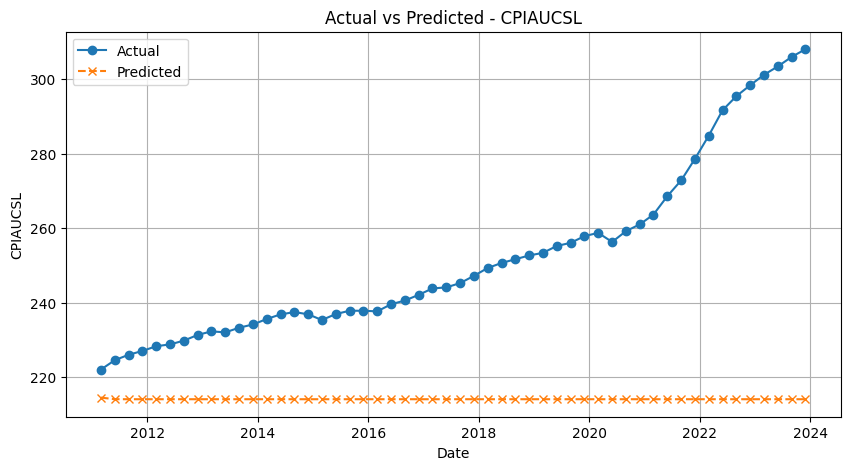

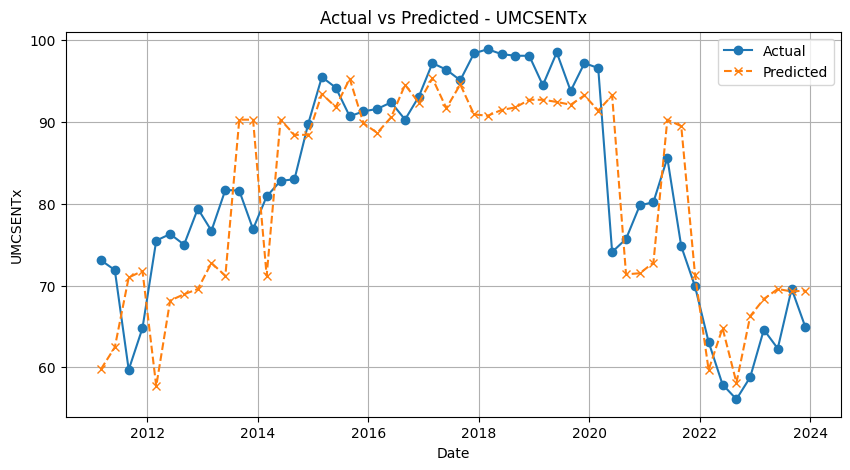

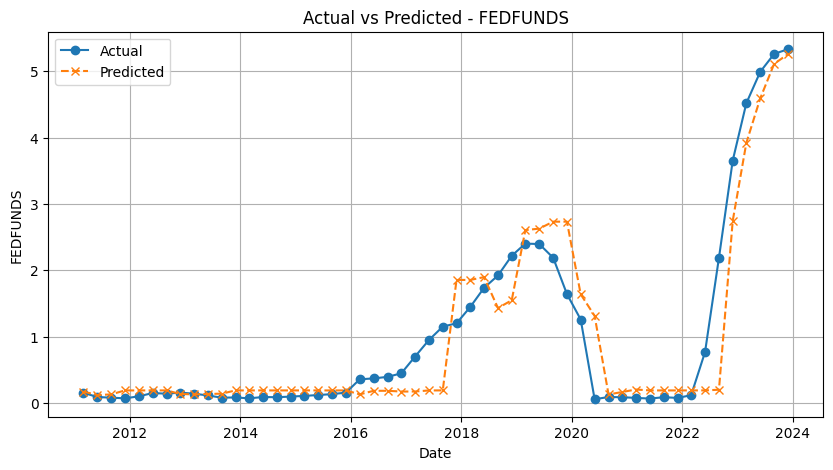

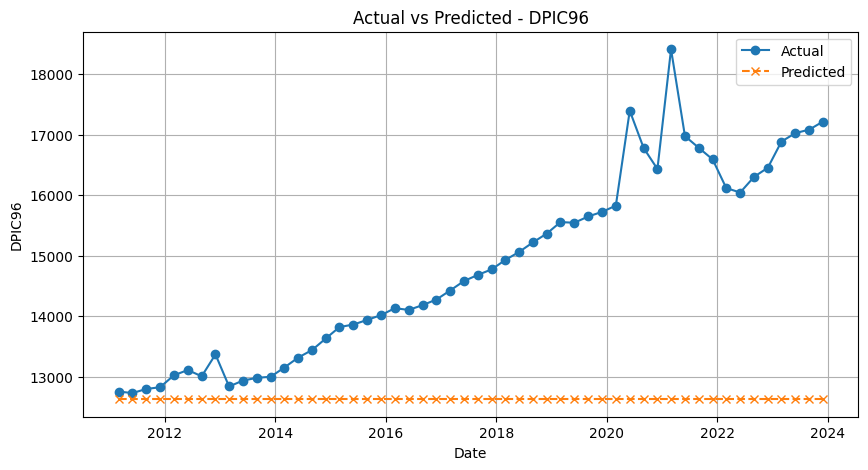

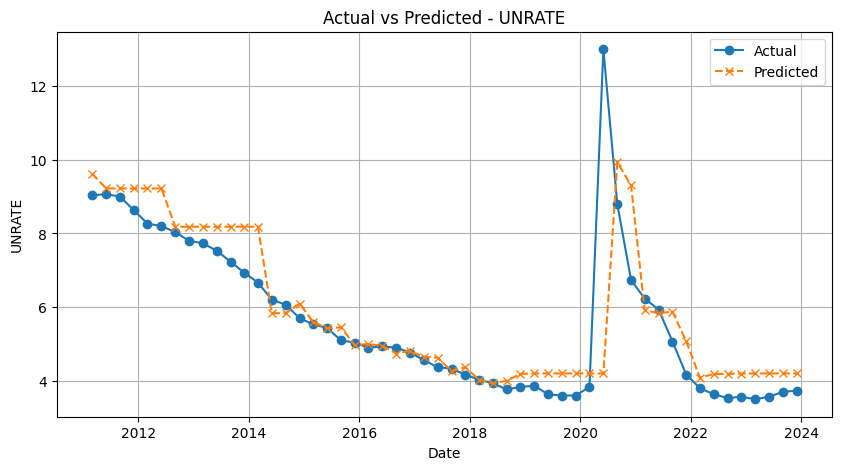

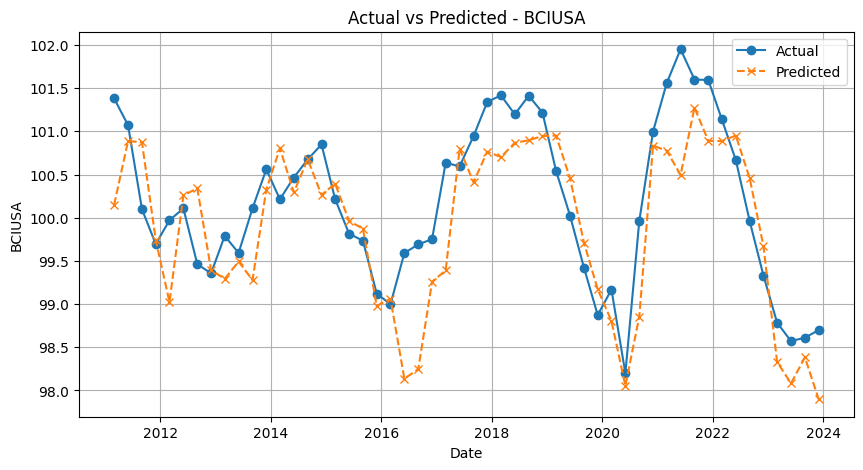

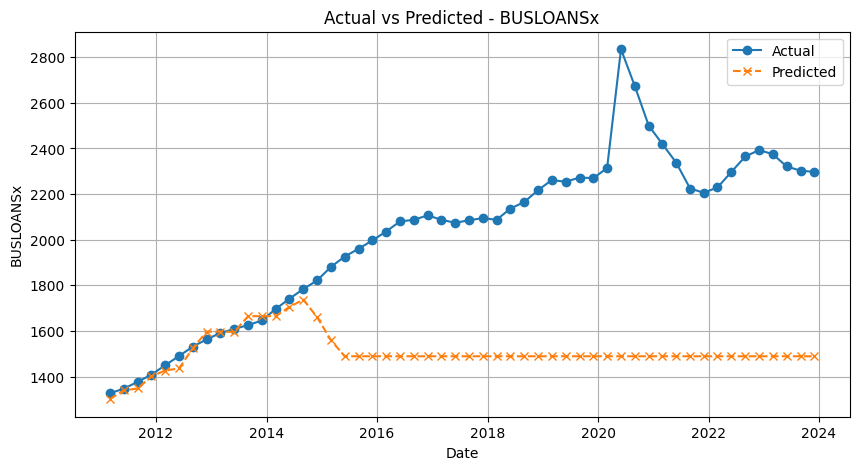

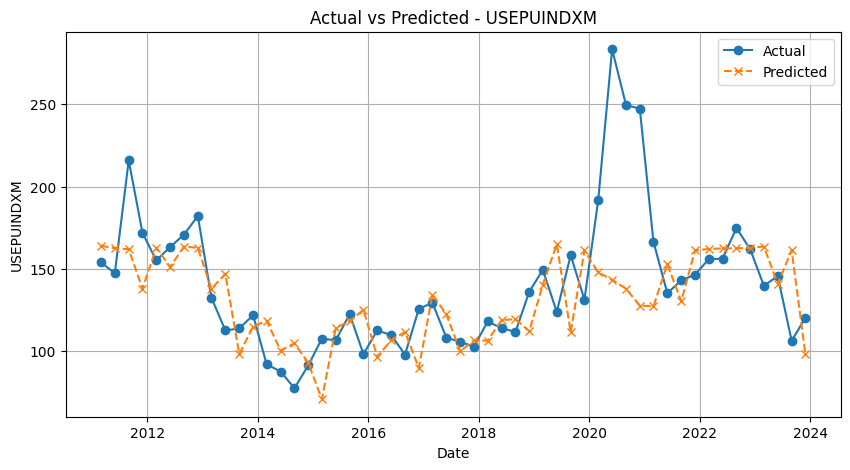

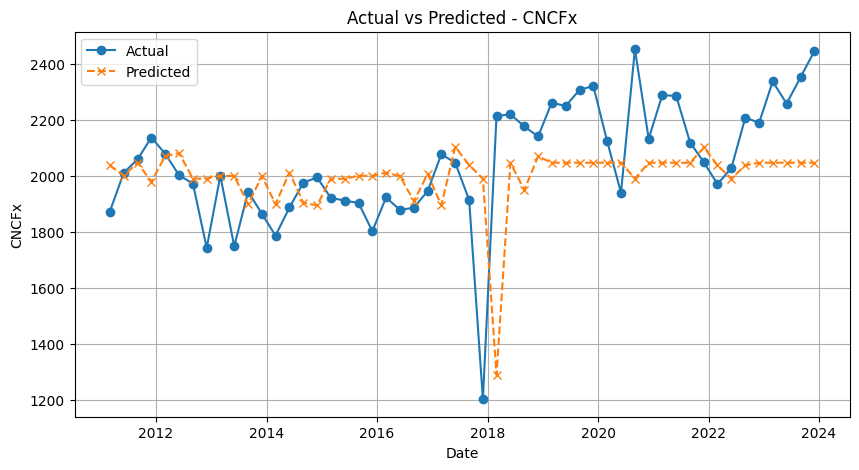

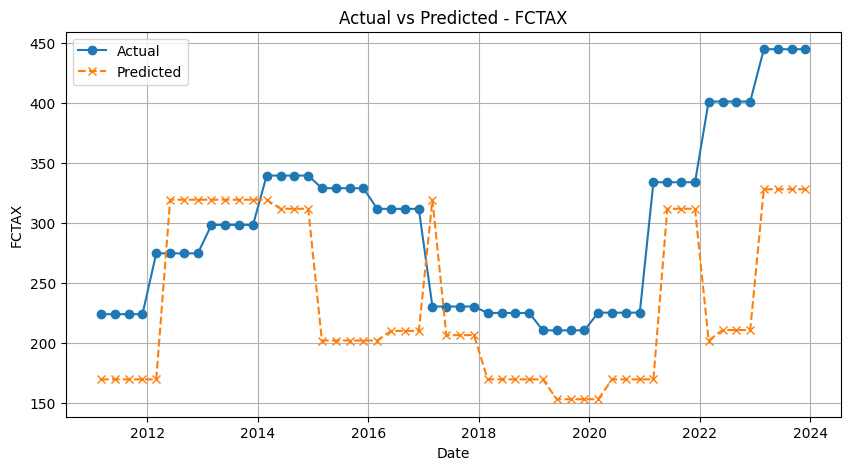

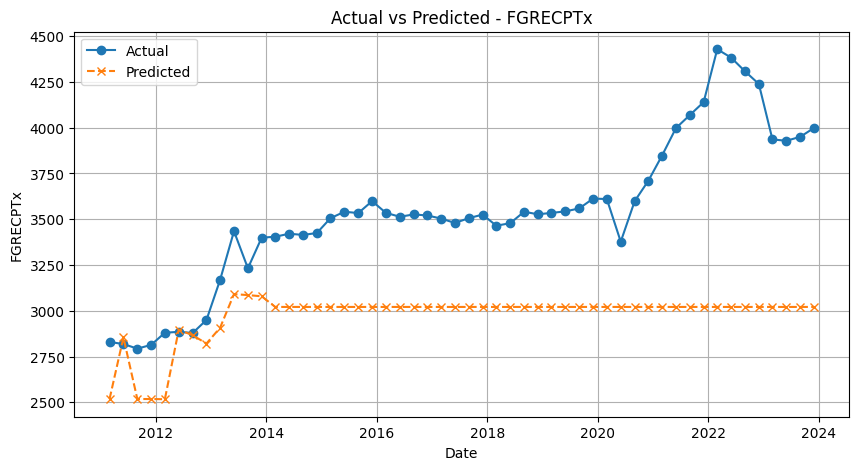

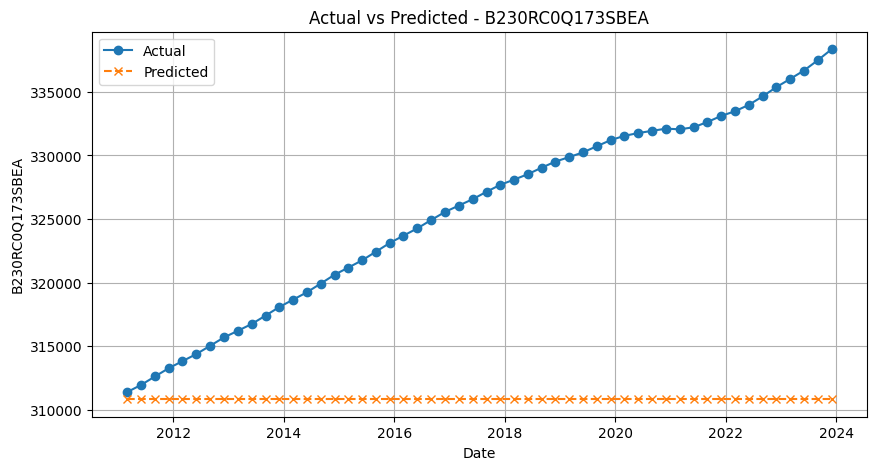

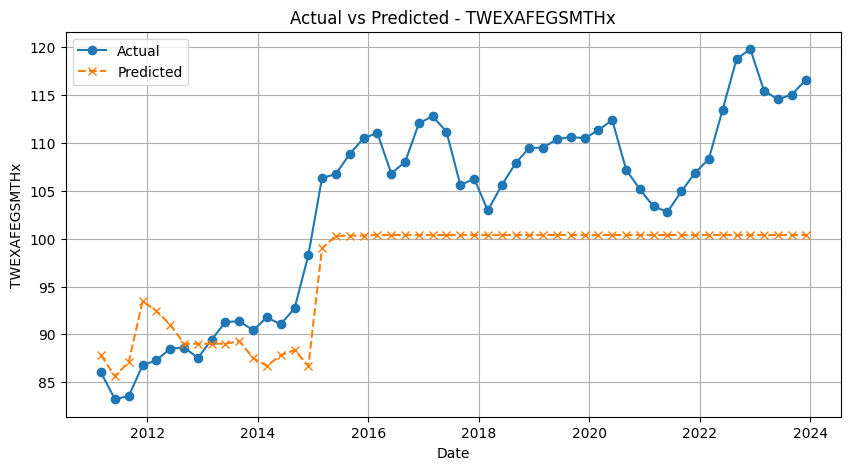

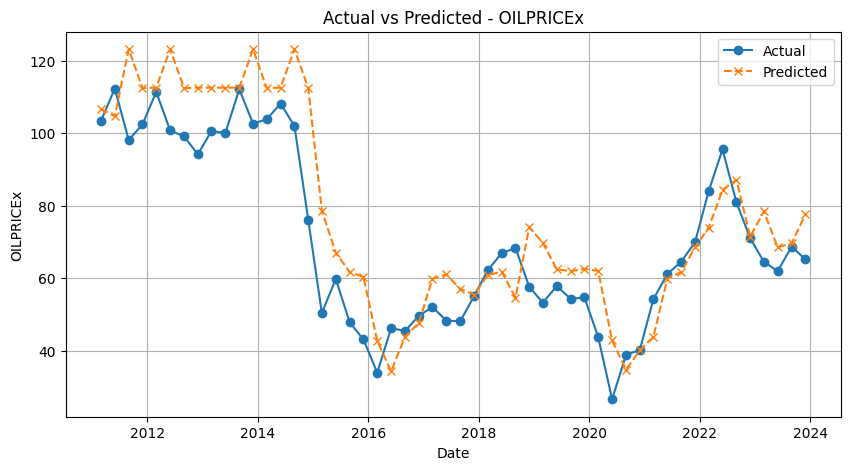

In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Work on a copy of df to preserve the original
df_copy = df.copy()

# Convert 'sasdate' to datetime format without modifying original df
df_copy["sasdate"] = pd.to_datetime(df_copy["sasdate"])
df_copy.set_index("sasdate", inplace=True)  # Set datetime as index

# Define variables to predict
variables = [
    "CPIAUCSL", "UMCSENTx", "FEDFUNDS", "DPIC96", "UNRATE", "BCIUSA",
    "BUSLOANSx", "USEPUINDXM", "CNCFx", "FCTAX", "FGRECPTx",
    "B230RC0Q173SBEA", "TWEXAFEGSMTHx", "OILPRICEx"
]

# Generate lag features (without modifying original df)
lags = 4  # Using last 4 quarters as features
for var in variables:
    for lag in range(1, lags + 1):
        df_copy[f"{var}_lag{lag}"] = df_copy[var].shift(lag)

# Drop rows with NaN values introduced by lagging
df_copy.dropna(inplace=True)

# Split data into train (until 2010-12-01) and test (from 2011-03-01)
train_df = df_copy.loc[:'2010-12-01']
test_df = df_copy.loc['2011-03-01':]

# Initialize storage for results
predictions = {}
rmse_scores = {}

# Train a separate XGBoost model for each variable
for var in variables:
    X_train = train_df[[f"{var}_lag{lag}" for lag in range(1, lags + 1)]]
    y_train = train_df[var]
    X_test = test_df[[f"{var}_lag{lag}" for lag in range(1, lags + 1)]]
    y_test = test_df[var]

    # Train the model
    model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Store predictions and RMSE
    predictions[var] = y_pred
    rmse_scores[var] = np.sqrt(mean_squared_error(y_test, y_pred))

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions, index=test_df.index)

# Display RMSE scores
rmse_df = pd.DataFrame(rmse_scores.items(), columns=["Variable", "RMSE"])
print("\nRMSE Scores:\n", rmse_df)

# Display Predictions
print("\nPredictions:\n", predictions_df.head())

# Plot actual vs predicted values for each variable
for var in variables:
    plt.figure(figsize=(10, 5))
    plt.plot(test_df.index, test_df[var], label="Actual", marker='o', linestyle='-')
    plt.plot(test_df.index, predictions_df[var], label="Predicted", marker='x', linestyle='--')
    plt.xlabel("Date")
    plt.ylabel(var)
    plt.title(f"Actual vs Predicted - {var}")
    plt.legend()
    plt.grid(True)
    plt.show()


RMSE Scores:
            Variable          RMSE
0          CPIAUCSL     44.882897
1          UMCSENTx      7.453574
2          FEDFUNDS      0.488481
3            DPIC96   2695.603357
4            UNRATE      1.385791
5            BCIUSA      0.622987
6         BUSLOANSx    634.642042
7        USEPUINDXM     37.438826
8             CNCFx    238.991143
9             FCTAX     90.023131
10         FGRECPTx    653.715691
11  B230RC0Q173SBEA  16609.001897
12    TWEXAFEGSMTHx      8.869854
13        OILPRICEx     12.824960

Predictions:
               CPIAUCSL   UMCSENTx  FEDFUNDS        DPIC96    UNRATE  \
sasdate                                                               
2011-03-01  214.513458  59.759613  0.175928  12625.998047  9.625514   
2011-06-01  214.086044  62.444382  0.122097  12625.998047  9.220818   
2011-09-01  214.078888  70.991386  0.133029  12625.998047  9.220818   
2011-12-01  214.078888  71.779518  0.192635  12625.998047  9.220818   
2012-03-01  214.078888  57.702141 

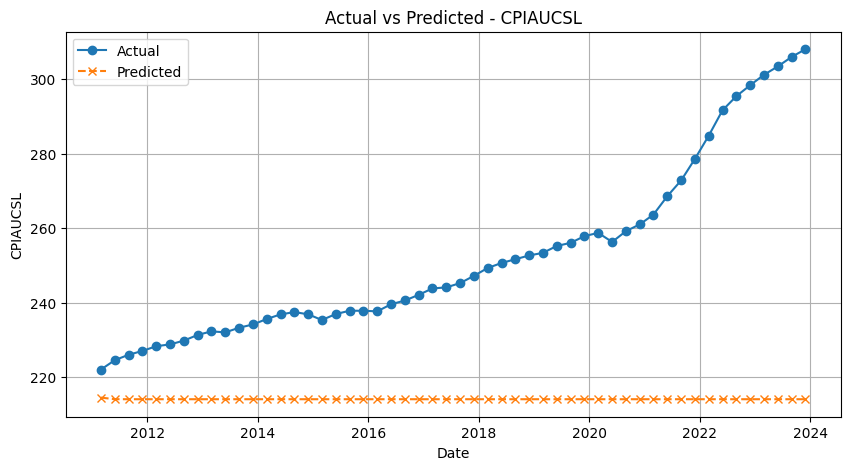

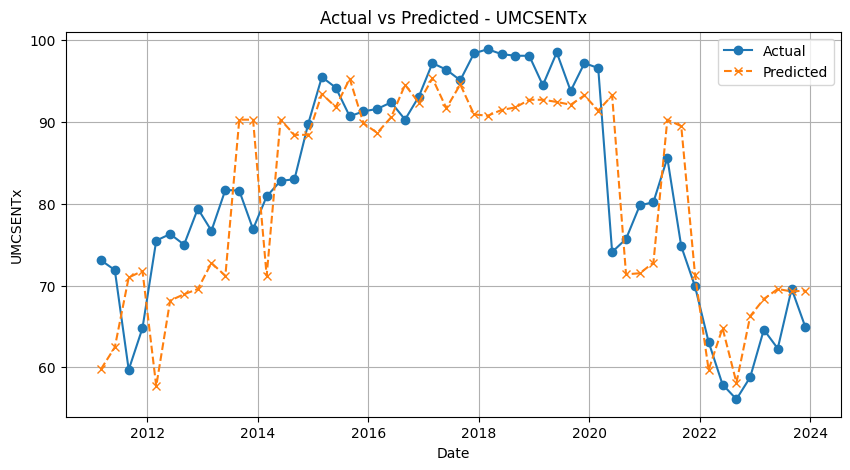

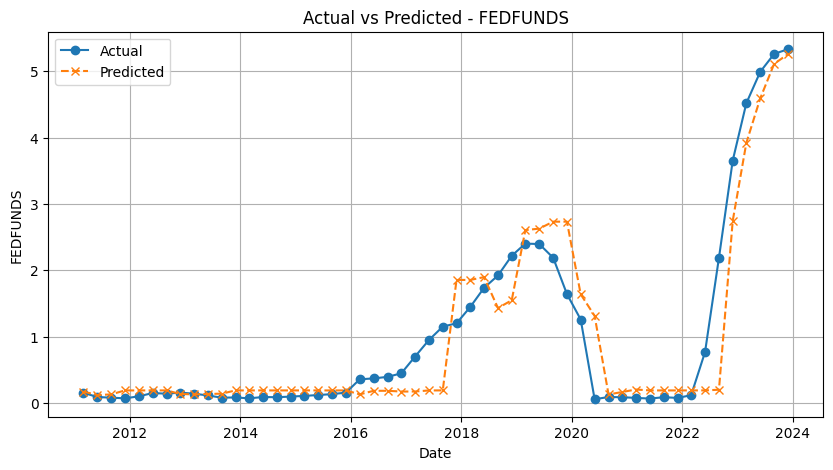

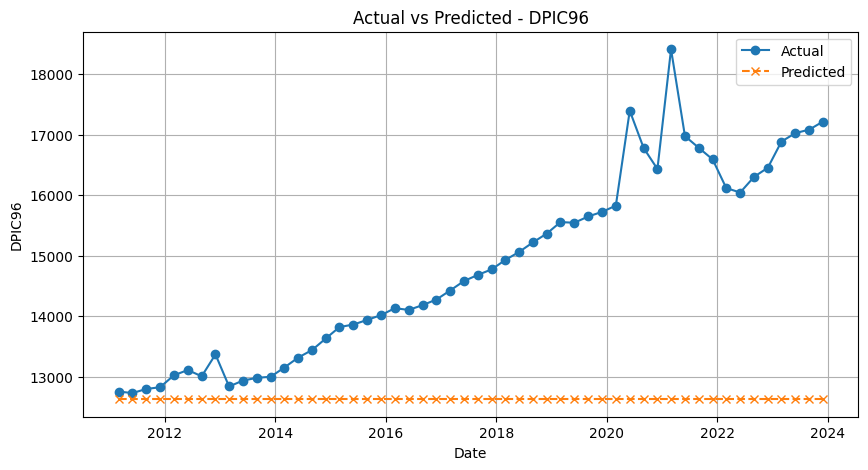

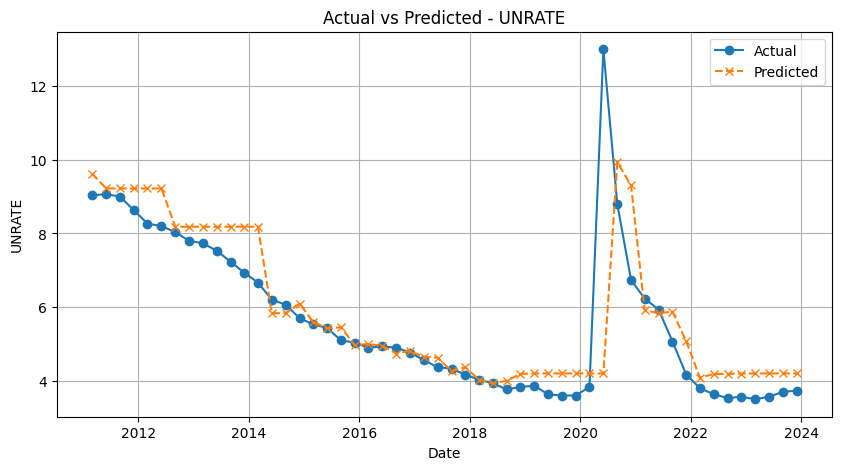

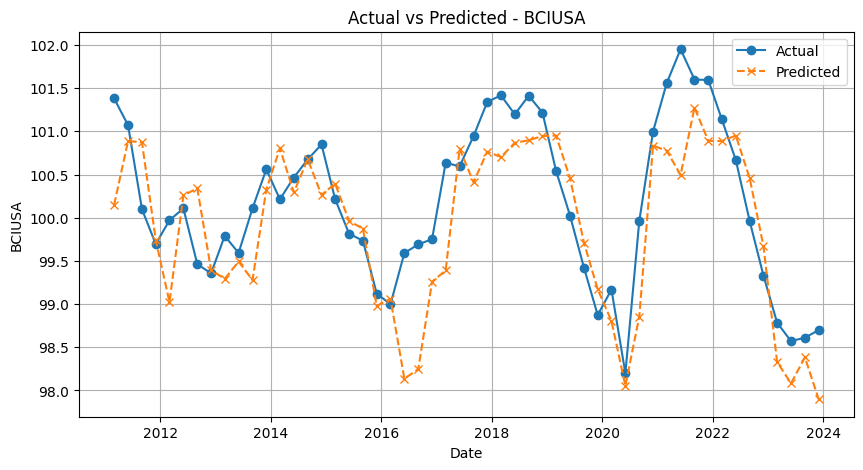

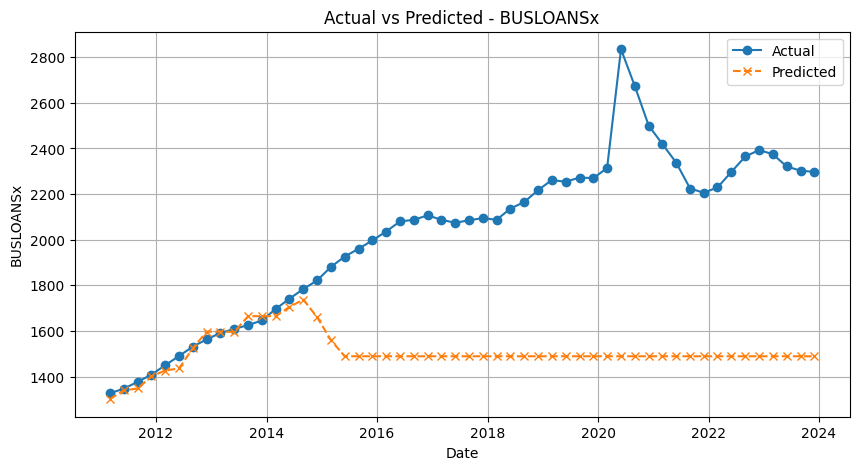

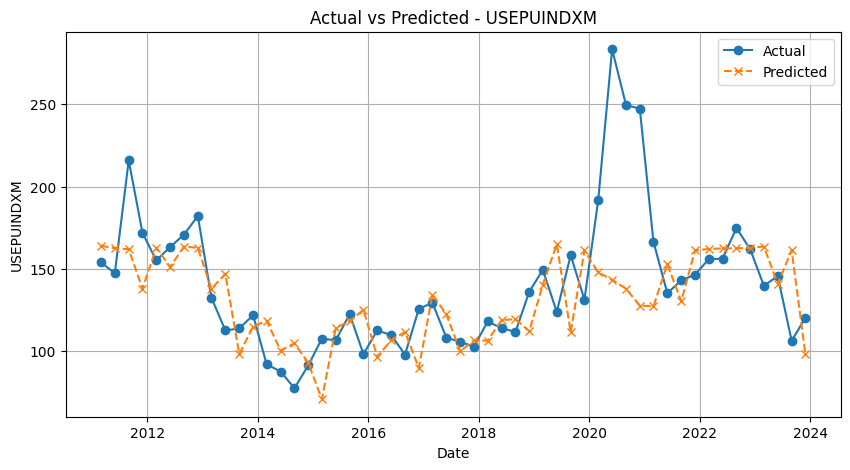

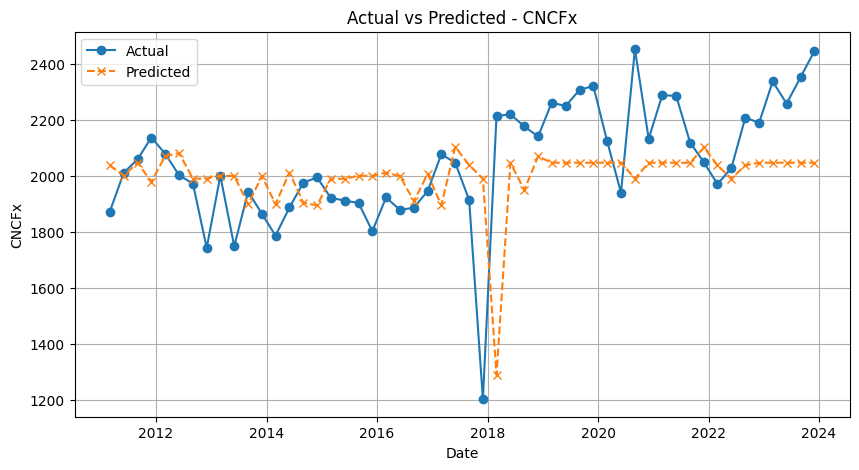

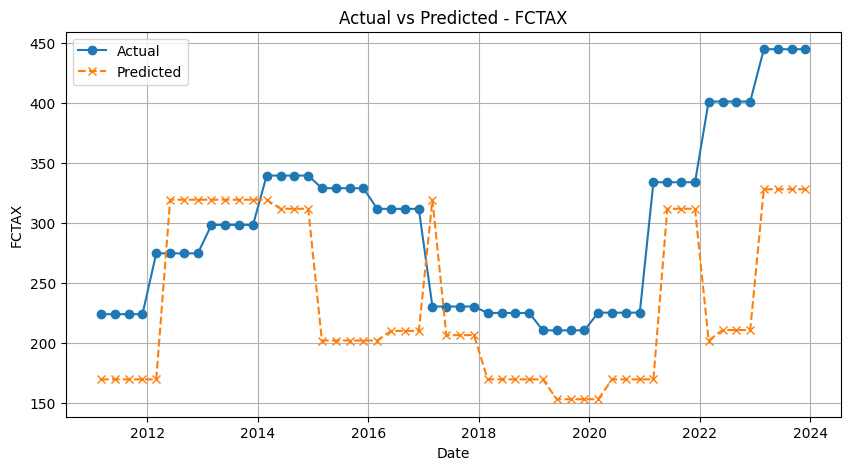

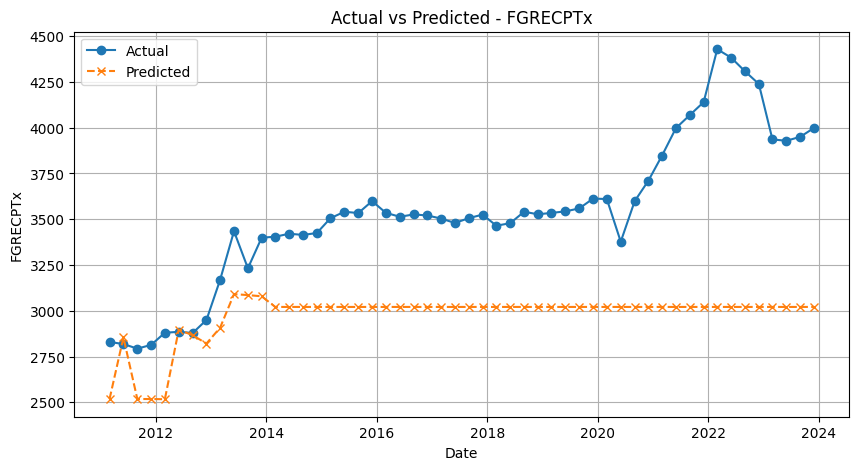

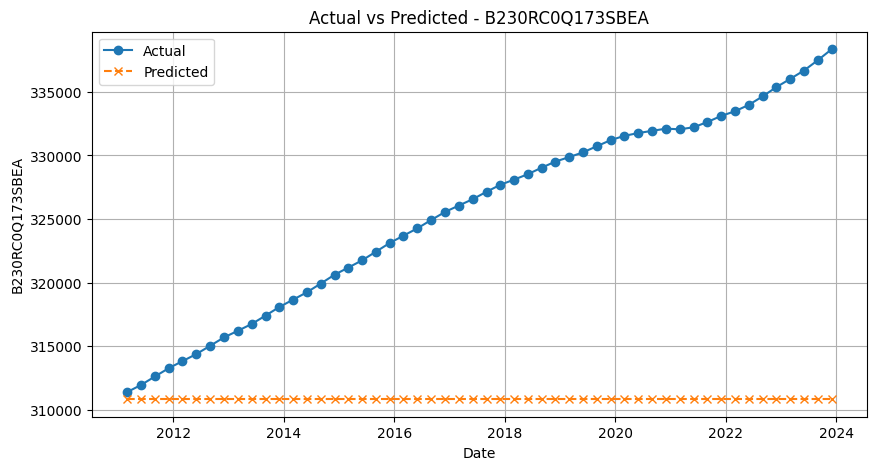

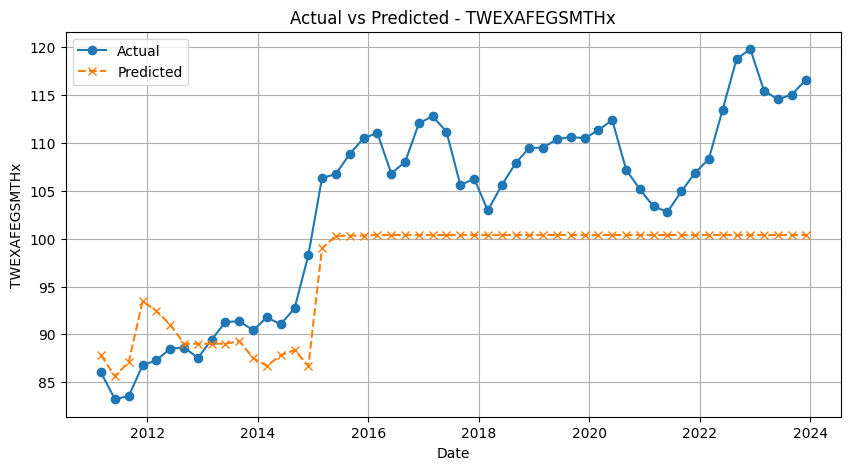

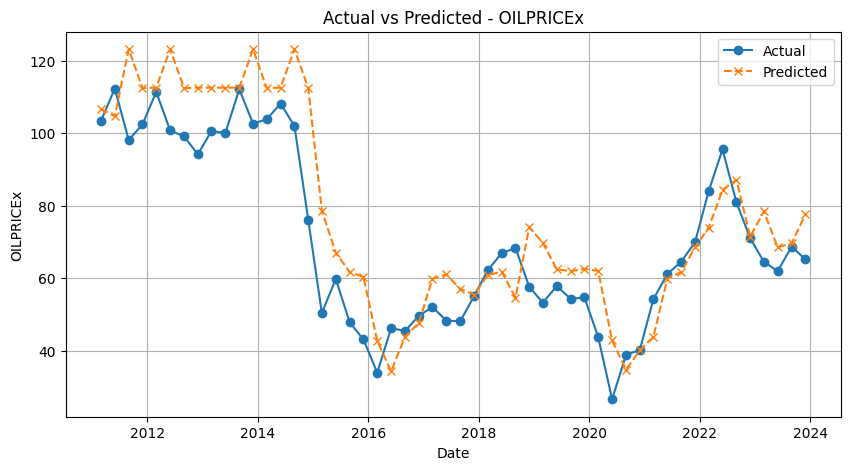

In [19]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Ensure 'sasdate' is in datetime format
df["sasdate"] = pd.to_datetime(df["sasdate"])
df.set_index("sasdate", inplace=True)  # Set it as index

# Define variables to predict
variables = [
    "CPIAUCSL", "UMCSENTx", "FEDFUNDS", "DPIC96", "UNRATE", "BCIUSA",
    "BUSLOANSx", "USEPUINDXM", "CNCFx", "FCTAX", "FGRECPTx",
    "B230RC0Q173SBEA", "TWEXAFEGSMTHx", "OILPRICEx"
]

# Generate lag features
lags = 4  # Using last 4 quarters as features
for var in variables:
    for lag in range(1, lags + 1):
        df[f"{var}_lag{lag}"] = df[var].shift(lag)

# Drop rows with NaN values introduced by lagging
df.dropna(inplace=True)

# Split data into train (until 2010-12-01) and test (from 2011-03-01)
train_df = df.loc[:'2010-12-01']
test_df = df.loc['2011-03-01':]

# Initialize storage for results
predictions = {}
rmse_scores = {}

# Train a separate XGBoost model for each variable
for var in variables:
    X_train = train_df[[f"{var}_lag{lag}" for lag in range(1, lags + 1)]]
    y_train = train_df[var]
    X_test = test_df[[f"{var}_lag{lag}" for lag in range(1, lags + 1)]]
    y_test = test_df[var]

    # Train the model
    model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Store predictions and RMSE
    predictions[var] = y_pred
    rmse_scores[var] = np.sqrt(mean_squared_error(y_test, y_pred))

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions, index=test_df.index)

# Display RMSE scores
rmse_df = pd.DataFrame(rmse_scores.items(), columns=["Variable", "RMSE"])
print("\nRMSE Scores:\n", rmse_df)

# Display Predictions
print("\nPredictions:\n", predictions_df.head())

# Plot actual vs predicted values for each variable
for var in variables:
    plt.figure(figsize=(10, 5))
    plt.plot(test_df.index, test_df[var], label="Actual", marker='o', linestyle='-')
    plt.plot(test_df.index, predictions_df[var], label="Predicted", marker='x', linestyle='--')
    plt.xlabel("Date")
    plt.ylabel(var)
    plt.title(f"Actual vs Predicted - {var}")
    plt.legend()
    plt.grid(True)
    plt.show()

<ipython-input-20-8efd2c97b2cd>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # This fills missing lag values with previous data



RMSE Scores:
            Variable          RMSE
0          CPIAUCSL     44.878646
1          UMCSENTx      8.595042
2          FEDFUNDS      0.498894
3            DPIC96   2695.553115
4            UNRATE      1.375884
5            BCIUSA      0.648555
6         BUSLOANSx    624.050084
7        USEPUINDXM     36.597174
8             CNCFx    238.158627
9             FCTAX     90.526831
10         FGRECPTx    652.964695
11  B230RC0Q173SBEA  16609.085706
12    TWEXAFEGSMTHx      8.873552
13        OILPRICEx     13.297854

Predictions:
               CPIAUCSL   UMCSENTx  FEDFUNDS       DPIC96    UNRATE  \
sasdate                                                              
2011-03-01  214.522461  59.766418  0.171863  12626.05957  9.627137   
2011-06-01  214.085358  62.701950  0.121941  12626.05957  9.215489   
2011-09-01  214.083893  71.044319  0.128692  12626.05957  9.215489   
2011-12-01  214.083893  71.910149  0.192211  12626.05957  9.215489   
2012-03-01  214.083893  57.754982  0.192

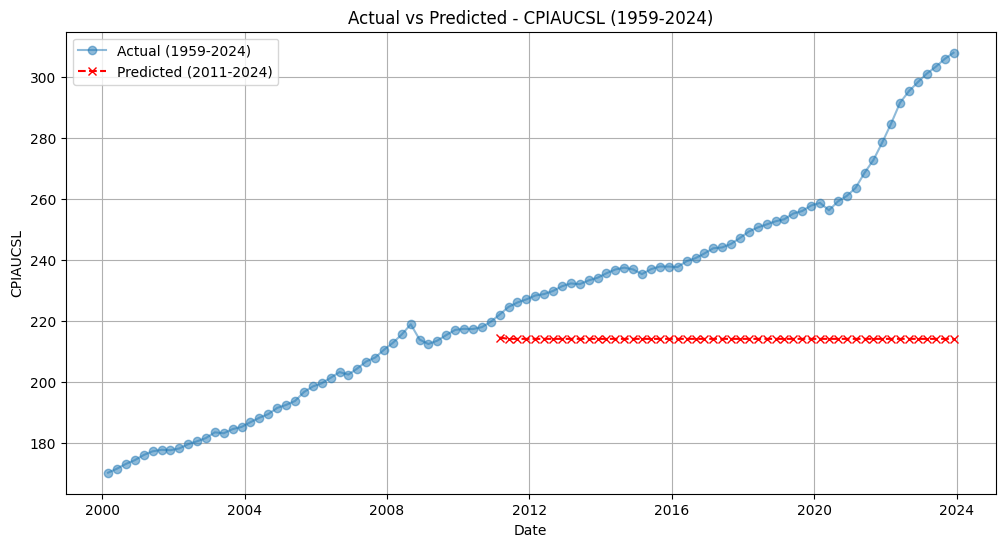

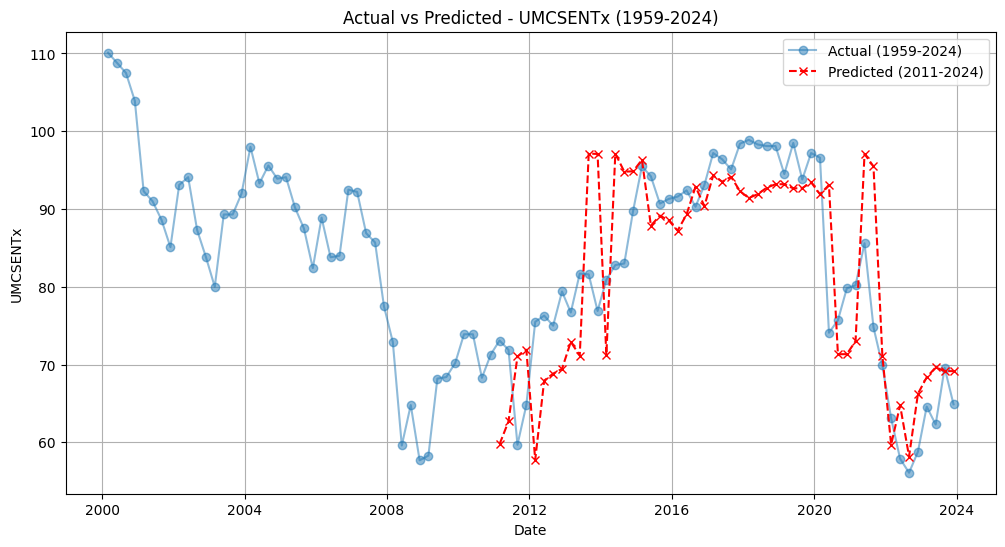

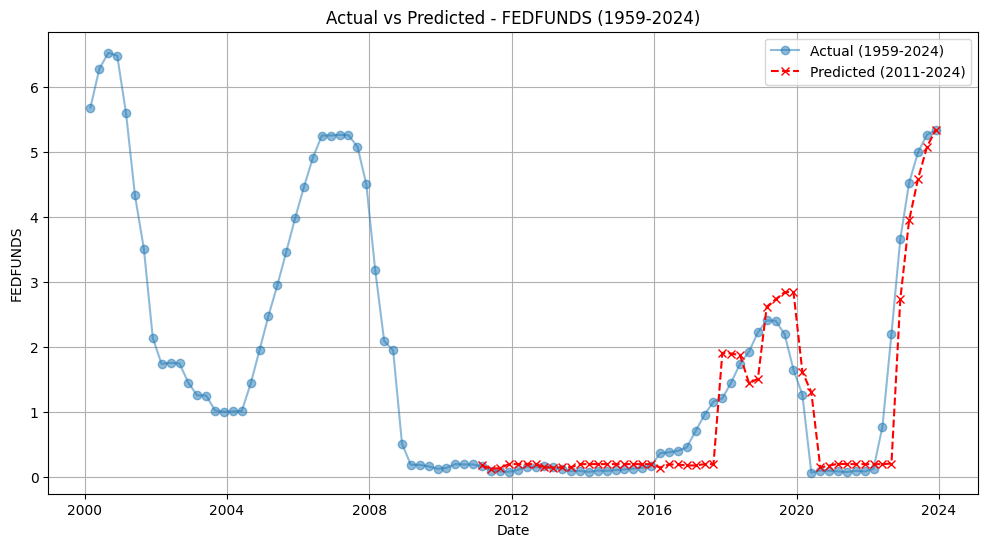

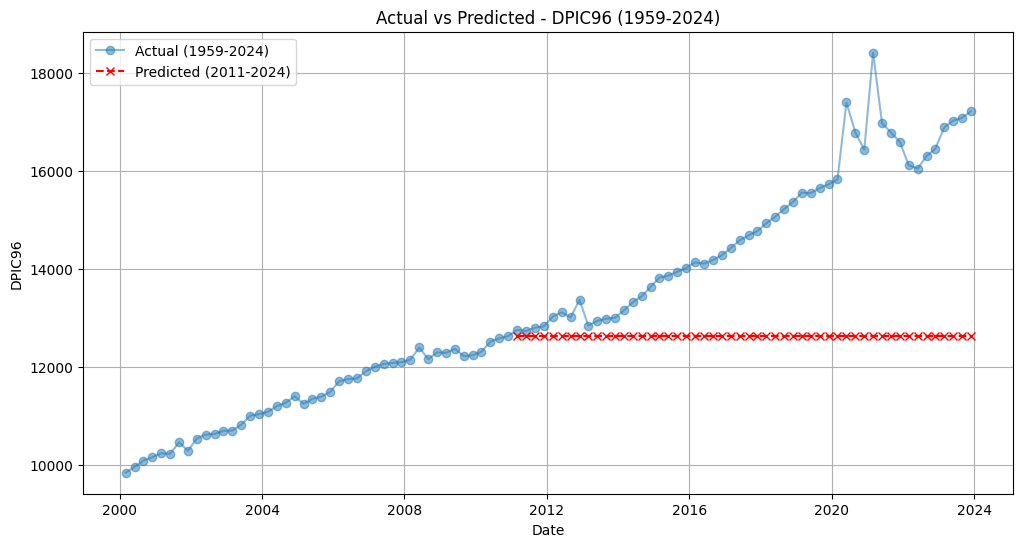

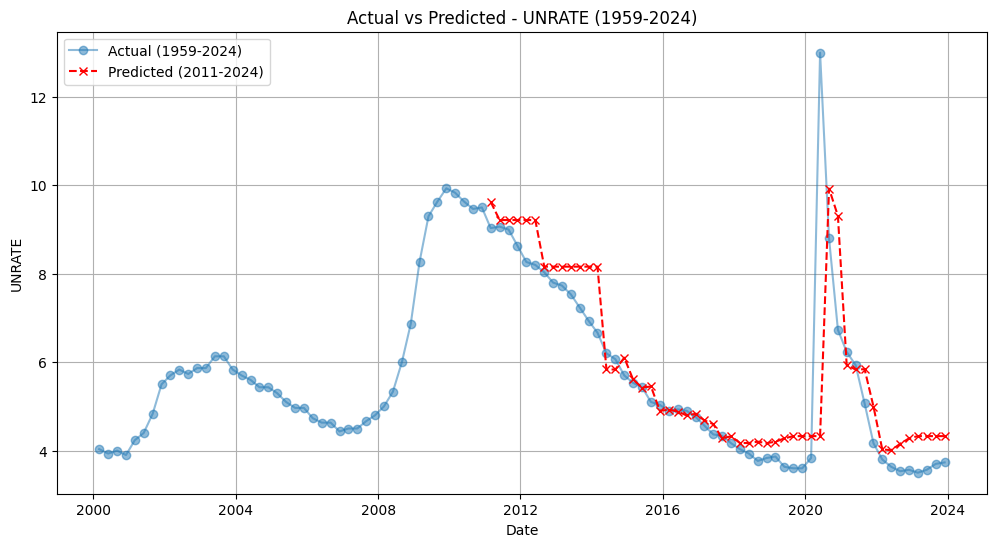

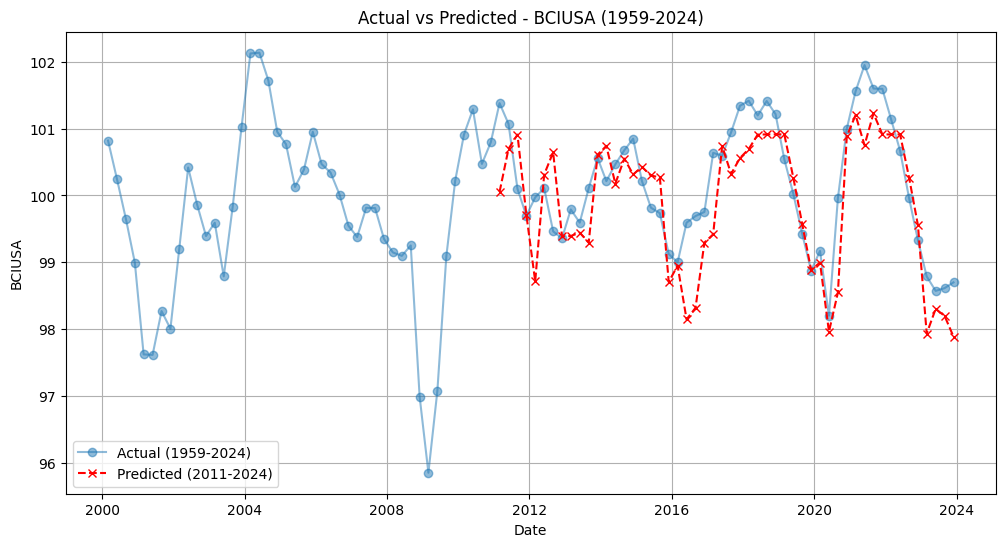

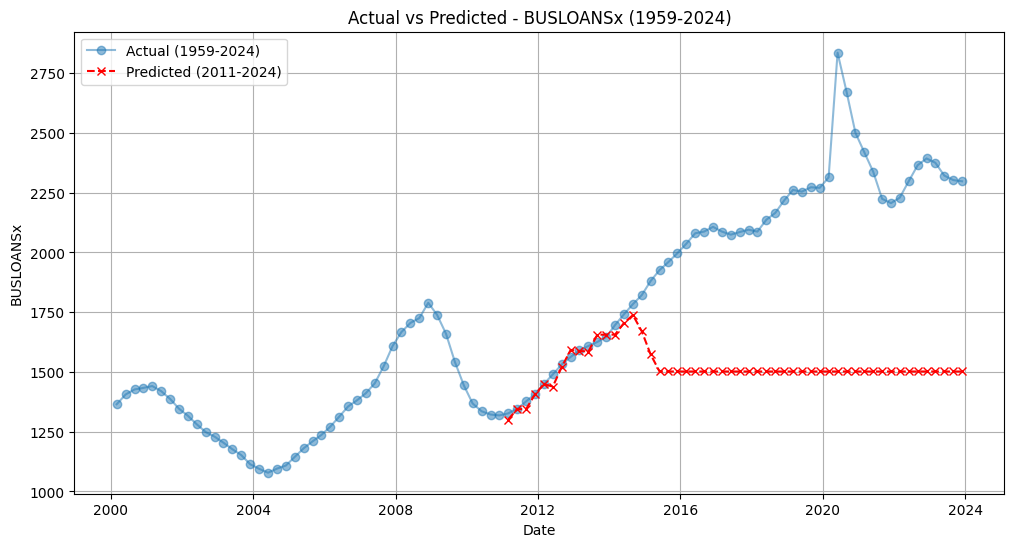

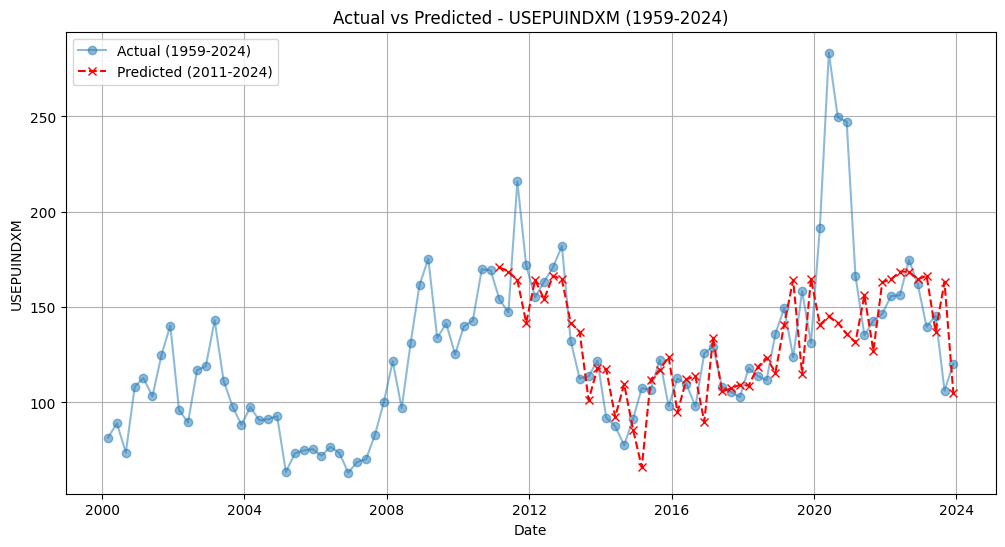

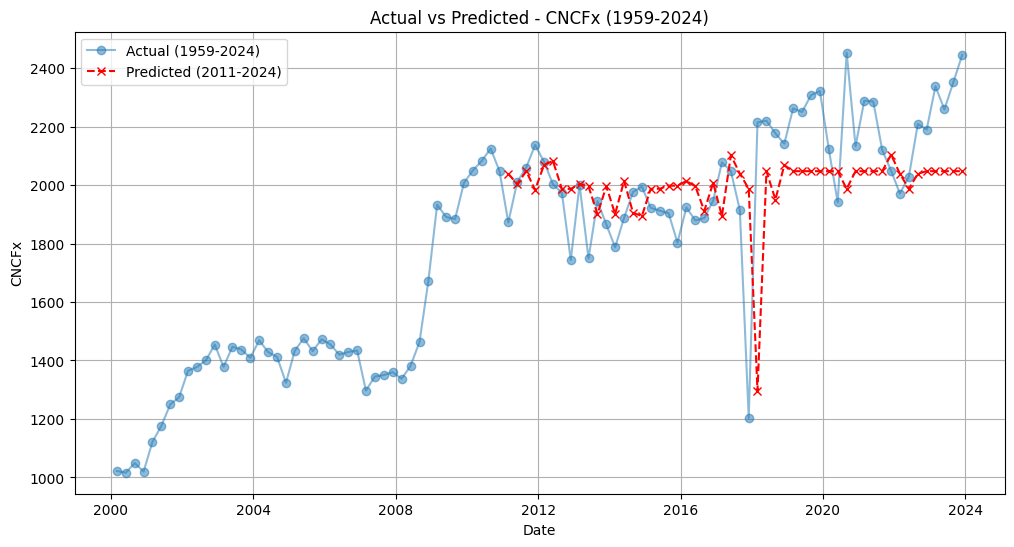

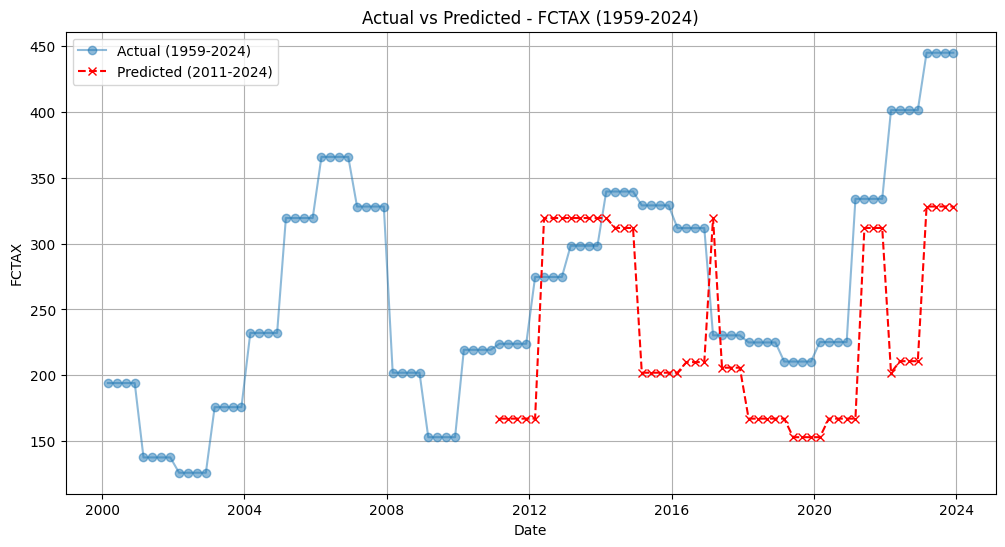

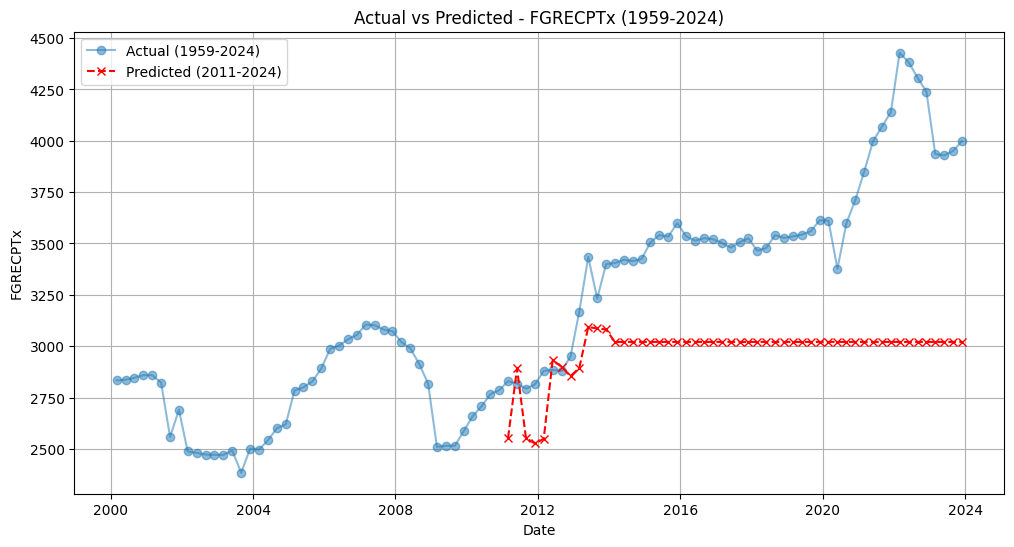

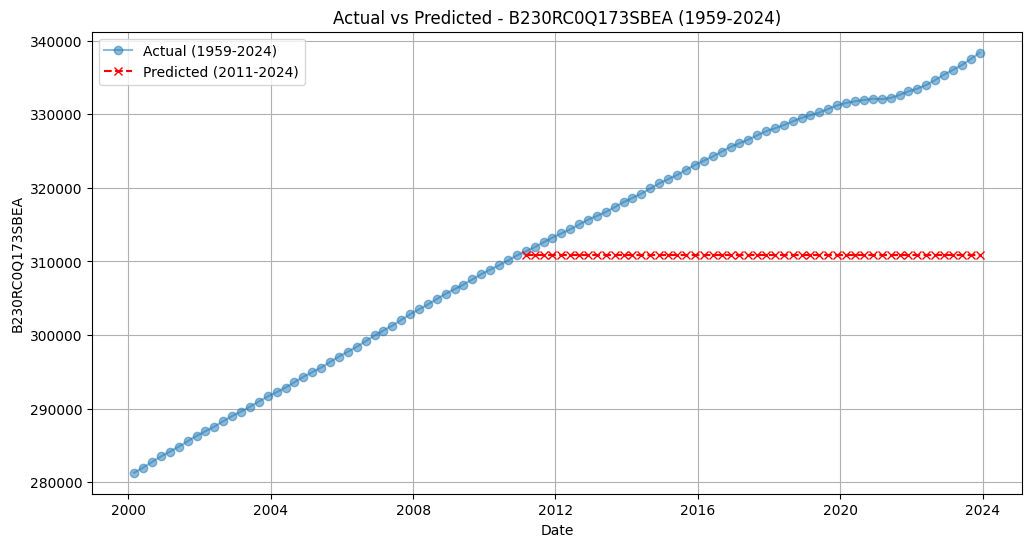

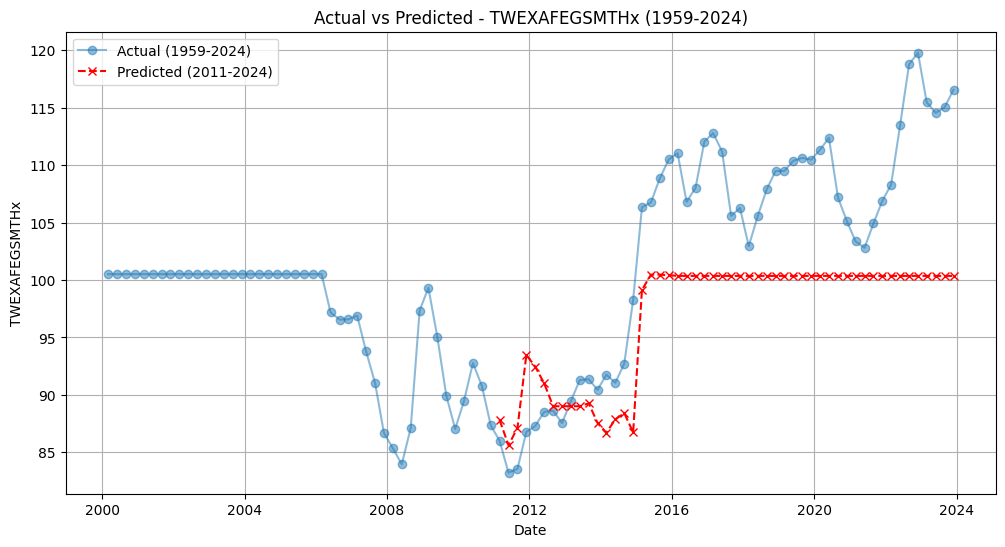

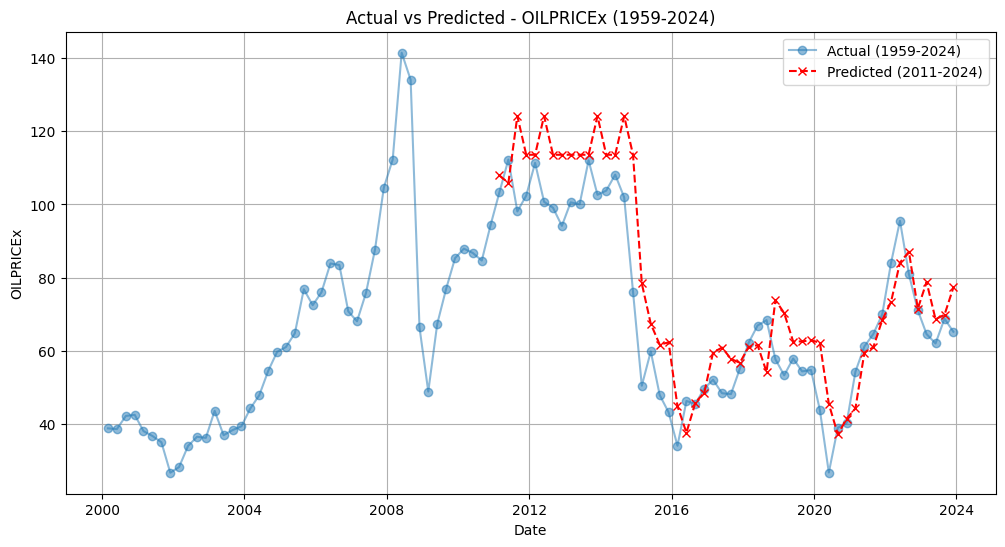

                GDPC1   PCECC96     PCDGx     PCESVx      PCNDx    GPDIC1  \
sasdate                                                                     
2000-03-01  13878.147  9039.743  652.9546  6513.3221  1983.4791  2351.223   
2000-06-01  14130.908  9124.152  640.8764  6589.4827  2022.8732  2490.501   
2000-09-01  14145.312  9211.569  651.7802  6649.3978  2036.3099  2466.375   
2000-12-01  14229.765  9292.050  656.3393  6707.7002  2055.9597  2471.534   
2001-03-01  14183.120  9325.751  667.2073  6736.6677  2043.8474  2358.969   

                 FPIx  Y033RC1Q027SBEAx      PNFIx     PRFIx  ...  \
sasdate                                                       ...   
2000-03-01  2358.7639          632.3517  1580.1201  808.1762  ...   
2000-06-01  2410.9171          655.6859  1629.4606  804.0665  ...   
2000-09-01  2421.4245          657.9046  1647.1818  791.5451  ...   
2000-12-01  2428.8193          656.6103  1653.3765  792.3332  ...   
2001-03-01  2414.7093          651.5294  1638.

In [20]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


df.index = pd.to_datetime(df.index)

# Define variables to predict
variables = [
    "CPIAUCSL", "UMCSENTx", "FEDFUNDS", "DPIC96", "UNRATE", "BCIUSA",
    "BUSLOANSx", "USEPUINDXM", "CNCFx", "FCTAX", "FGRECPTx",
    "B230RC0Q173SBEA", "TWEXAFEGSMTHx", "OILPRICEx"
]
# Generate lag features
lags = 4  # Using last 4 quarters as features
for var in variables:
    for lag in range(1, lags + 1):
        df[f"{var}_lag{lag}"] = df[var].shift(lag)

# Instead of dropping all rows with NaN, forward-fill missing values
df.fillna(method="ffill", inplace=True)  # This fills missing lag values with previous data



# Split data into train (until 2010-12-01) and test (from 2011-03-01)
train_df = df.loc[:'2010-12-01']
test_df = df.loc['2011-03-01':]

# Initialize storage for results
predictions = {}
rmse_scores = {}

# Train a separate XGBoost model for each variable
for var in variables:
    X_train = train_df[[f"{var}_lag{lag}" for lag in range(1, lags + 1)]]
    y_train = train_df[var]
    X_test = test_df[[f"{var}_lag{lag}" for lag in range(1, lags + 1)]]
    y_test = test_df[var]

    # Train the model
    model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Store predictions and RMSE
    predictions[var] = y_pred
    rmse_scores[var] = np.sqrt(mean_squared_error(y_test, y_pred))

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions, index=test_df.index)

# Display RMSE scores
rmse_df = pd.DataFrame(rmse_scores.items(), columns=["Variable", "RMSE"])
print("\nRMSE Scores:\n", rmse_df)

# Display Predictions
print("\nPredictions:\n", predictions_df.head())

# Plot actual vs predicted values for each variable from 1959 to 2024
for var in variables:
    plt.figure(figsize=(12, 6))

    # Plot the entire actual data
    plt.plot(df.index, df[var], label="Actual (1959-2024)", marker='o', linestyle='-', alpha=0.5)

    # Highlight the predicted values
    plt.plot(test_df.index, predictions_df[var], label="Predicted (2011-2024)", marker='x', linestyle='--', color='red')

    plt.xlabel("Date")
    plt.ylabel(var)
    plt.title(f"Actual vs Predicted - {var} (1959-2024)")
    plt.legend()
    plt.grid(True)
    plt.show()

print(df.head())

In [21]:
import statsmodels.api as sm

# Define ARIMA orders for each variable
arima_orders = {
    "FEDFUNDS": (3,1,1),
    "UNRATE": (1,0,0),
    "BUSLOANSx": (1,0,0),
    "USEPUINDXM": (1,0,0),
    "CNCFx": (1,1,1),
    "FCTAX": (1,1,1),
    "FGRECPTx": (1,1,2),
    "TWEXAFEGSMTHx": (1,1,1),
    "OILPRICEx": (2,1,2),
    "BCIUSA": (3,0,2),
    "CPIAUCSL": (1,1,3),
    "DPIC96": (1,0,0),
    "UMCSENTx": (1,0,0),
    "B230RC0Q173SBEA": (3,1,3)
}

# Initialize storage for results
arima_predictions = {}
mape_scores_arima = {}

# Train ARIMA model for each variable
for var in arima_orders.keys():
    order = arima_orders[var]

    # Extract training and testing data
    train_series = train_df[var]
    test_series = test_df[var]

    try:
        # Fit ARIMA model
        model = sm.tsa.ARIMA(train_series, order=order)
        model_fit = model.fit()

        # Make predictions
        y_pred = model_fit.forecast(steps=len(test_series))

        # Store predictions and compute MAPE
        arima_predictions[var] = y_pred
        mape_scores_arima[var] = mean_absolute_percentage_error(test_series, y_pred)

    except Exception as e:
        print(f"Error with {var}: {e}")
        arima_predictions[var] = None
        mape_scores_arima[var] = None

# Convert predictions to DataFrame
arima_predictions_df = pd.DataFrame(arima_predictions, index=test_df.index)

# Display MAPE scores
mape_arima_df = pd.DataFrame(mape_scores_arima.items(), columns=["Variable", "MAPE (%)"])
print("\nARIMA MAPE Scores:\n", mape_arima_df)

# Display Predictions
print("\nARIMA Predictions:\n", arima_predictions_df.head())

# Plot actual vs predicted values for each variable
for var in arima_orders.keys():
    if arima_predictions[var] is not None:
        plt.figure(figsize=(12, 6))

        # Plot the entire actual data
        plt.plot(df.index, df[var], label="Actual (1959-2024)", marker='o', linestyle='-', alpha=0.5)

        # Highlight the predicted values
        plt.plot(arima_predictions_df.index, arima_predictions_df[var], label="Predicted (2011-2024)", marker='x', linestyle='--', color='red')

        plt.xlabel("Date")
        plt.ylabel(var)
        plt.title(f"ARIMA Actual vs Predicted - {var} (1959-2024)")
        plt.legend()
        plt.grid(True)
        plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be use

Error with FEDFUNDS: name 'mean_absolute_percentage_error' is not defined
Error with UNRATE: name 'mean_absolute_percentage_error' is not defined
Error with BUSLOANSx: name 'mean_absolute_percentage_error' is not defined
Error with USEPUINDXM: name 'mean_absolute_percentage_error' is not defined


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be use

Error with CNCFx: name 'mean_absolute_percentage_error' is not defined
Error with FCTAX: name 'mean_absolute_percentage_error' is not defined
Error with FGRECPTx: name 'mean_absolute_percentage_error' is not defined


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be use

Error with TWEXAFEGSMTHx: name 'mean_absolute_percentage_error' is not defined
Error with OILPRICEx: name 'mean_absolute_percentage_error' is not defined


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Error with BCIUSA: name 'mean_absolute_percentage_error' is not defined


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-

Error with CPIAUCSL: name 'mean_absolute_percentage_error' is not defined
Error with DPIC96: name 'mean_absolute_percentage_error' is not defined
Error with UMCSENTx: name 'mean_absolute_percentage_error' is not defined
Error with B230RC0Q173SBEA: name 'mean_absolute_percentage_error' is not defined

ARIMA MAPE Scores:
            Variable MAPE (%)
0          FEDFUNDS     None
1            UNRATE     None
2         BUSLOANSx     None
3        USEPUINDXM     None
4             CNCFx     None
5             FCTAX     None
6          FGRECPTx     None
7     TWEXAFEGSMTHx     None
8         OILPRICEx     None
9            BCIUSA     None
10         CPIAUCSL     None
11           DPIC96     None
12         UMCSENTx     None
13  B230RC0Q173SBEA     None

ARIMA Predictions:
            FEDFUNDS UNRATE BUSLOANSx USEPUINDXM CNCFx FCTAX FGRECPTx  \
sasdate                                                                
2011-03-01     None   None      None       None  None  None     None   
2011-0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 319ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 314ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 322ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 328ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step

LSTM MAPE Scores:
            Variable    MAPE (%)
0          CPIAUCSL    1.070605
1          UMCSENTx         NaN
2          FEDFUNDS  127.144938
3            DPIC96    2.085414
4            UNRATE    8.389083
5            BCIUSA    0.399015
6         BUSLOANSx    5.084526
7        USEPUINDXM   14.000090
8             CNCFx    8.421148
9             FCTAX    7.686810
10         FGRECPTx    4.716513
11  B230RC0Q173SBEA    0.936794
12    TWEXAFEGSMTHx    4.970377
13        OILPRICEx   17.524463

LSTM Predictions:
               CPIAUCSL  UMCSENTx  FEDFUNDS        DPIC96    UNRATE  \
sasdate                                                              
2012-03-01  227.207306       NaN  0.072698  13007.082031  8.415646   
2012-06-01  229.038635       NaN  0.062427  13050.603516  7.902302   
2012-09-01  230.276764       NaN  0.078358  13142.552734  7.750695   
2012-12-01  231.320724       NaN  0.099872  13220.091797  7.827891   
2013-03-01  232.40771

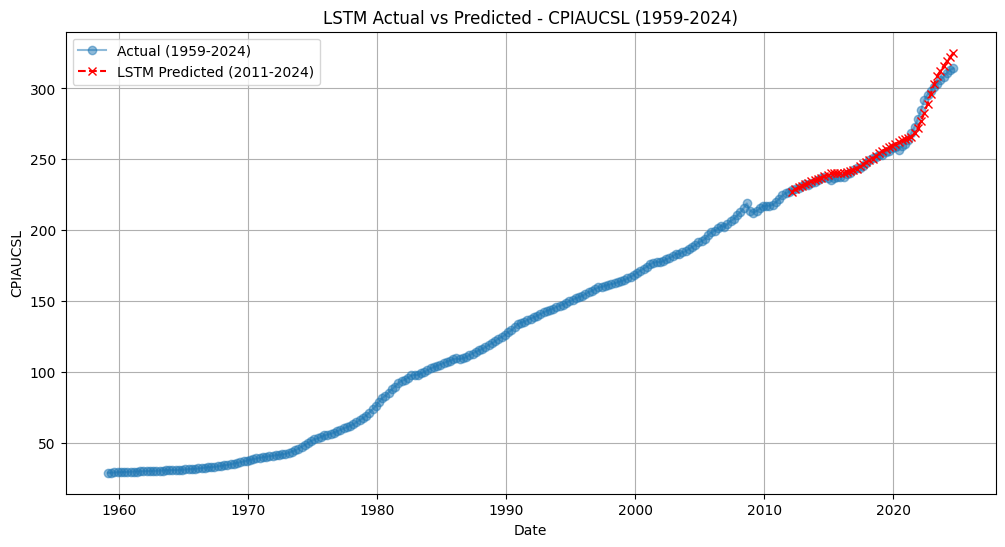

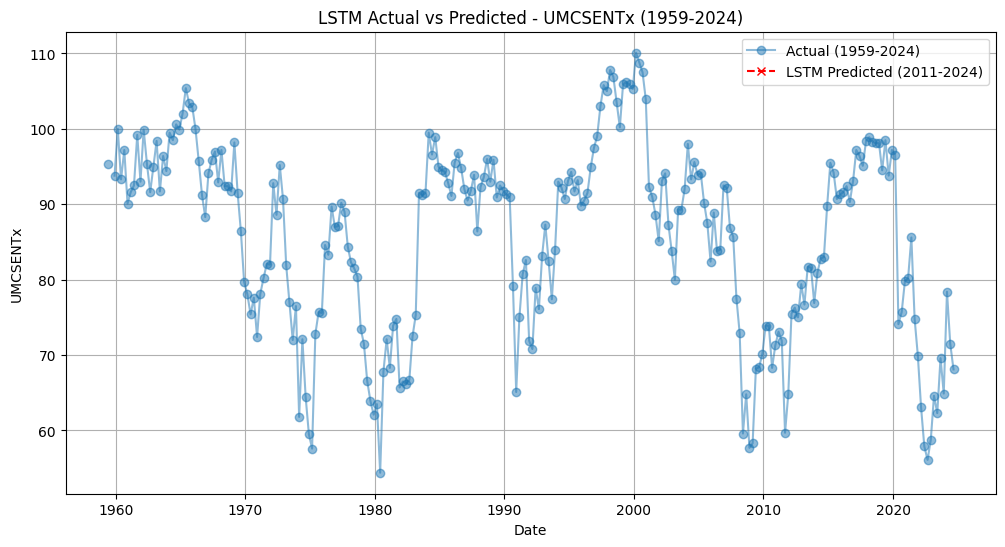

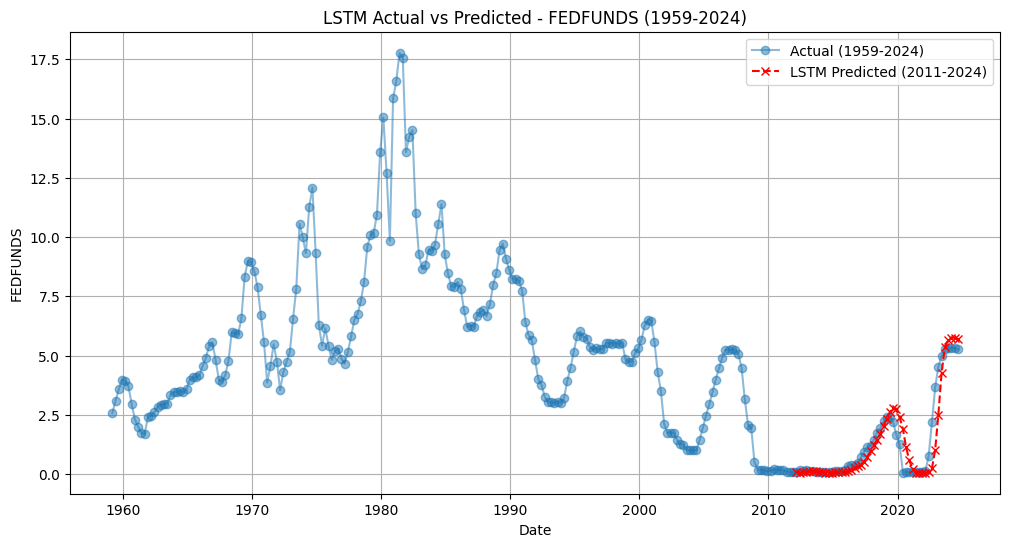

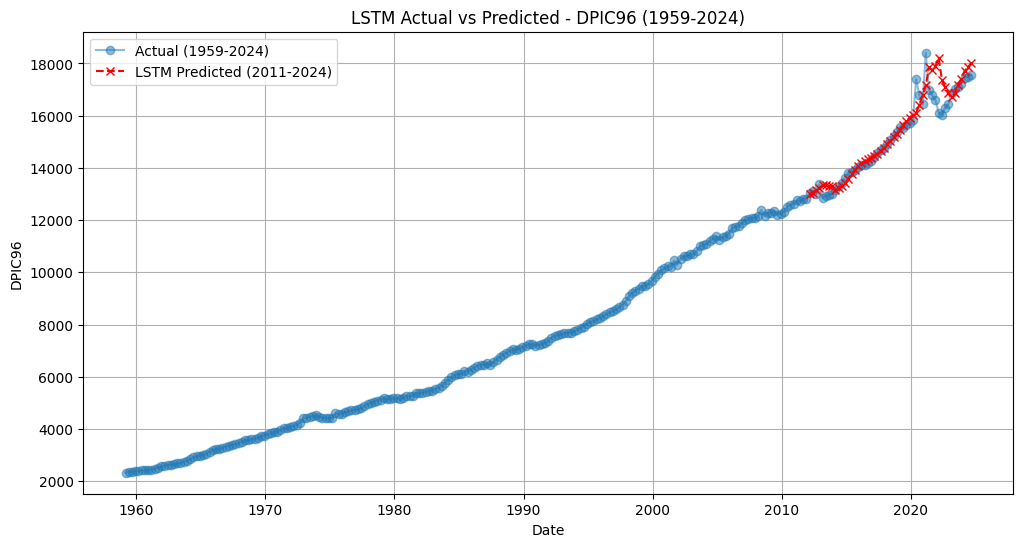

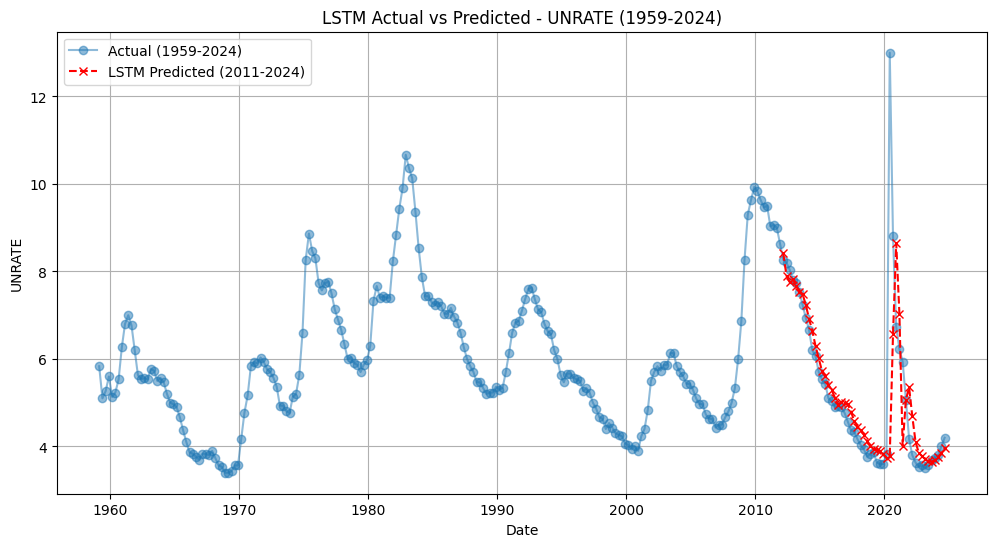

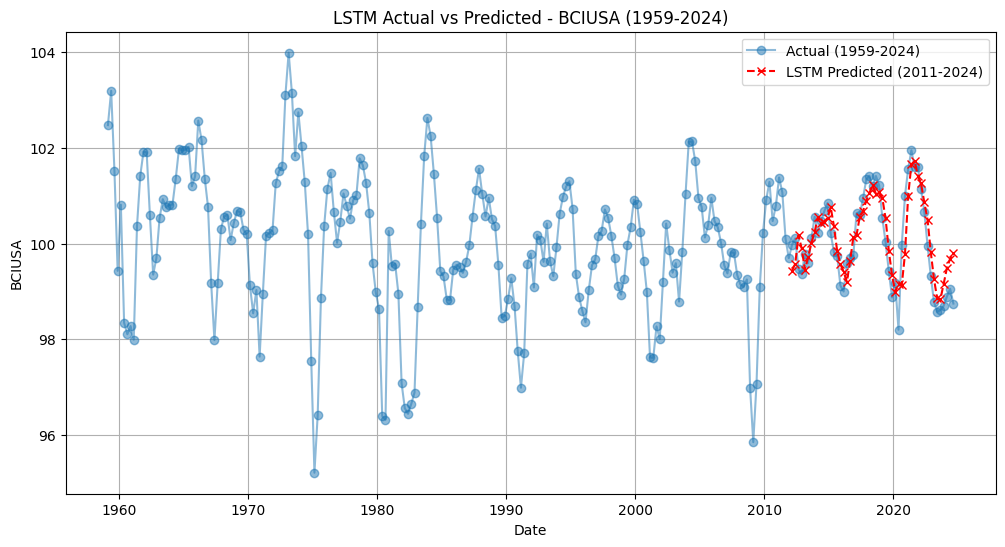

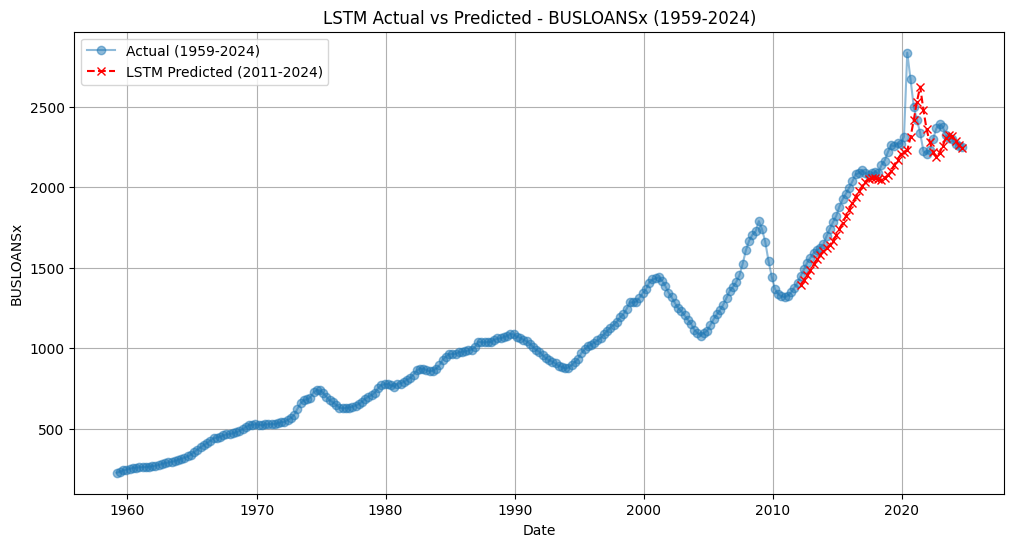

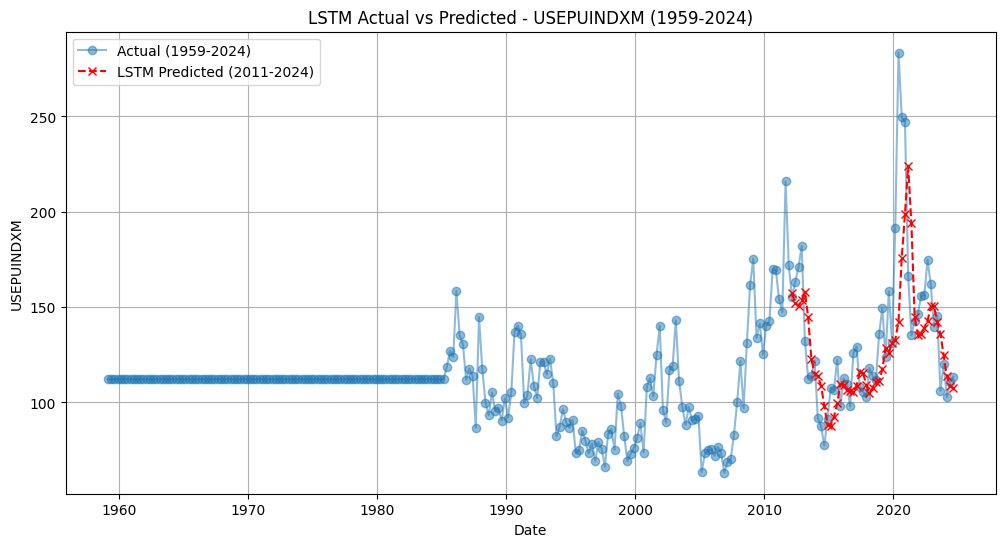

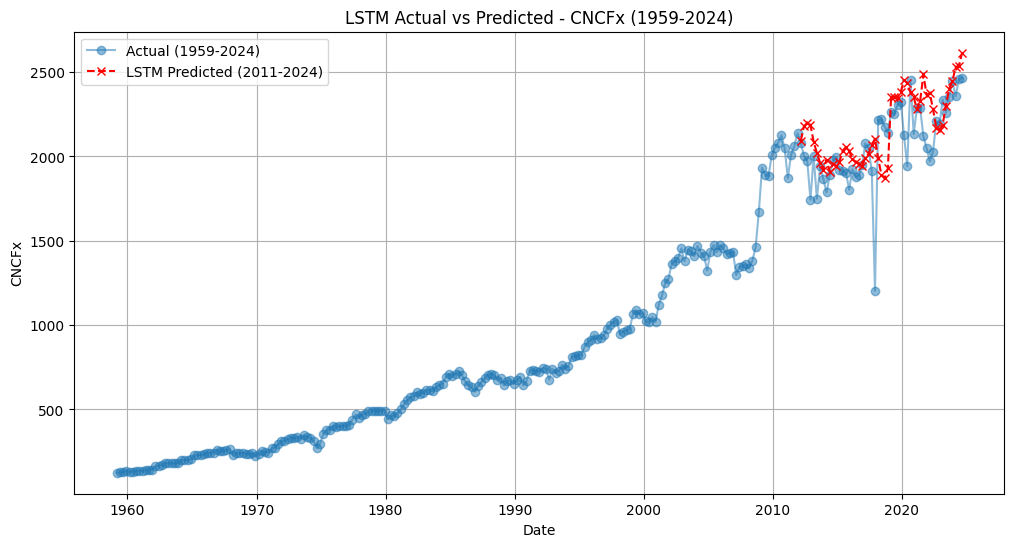

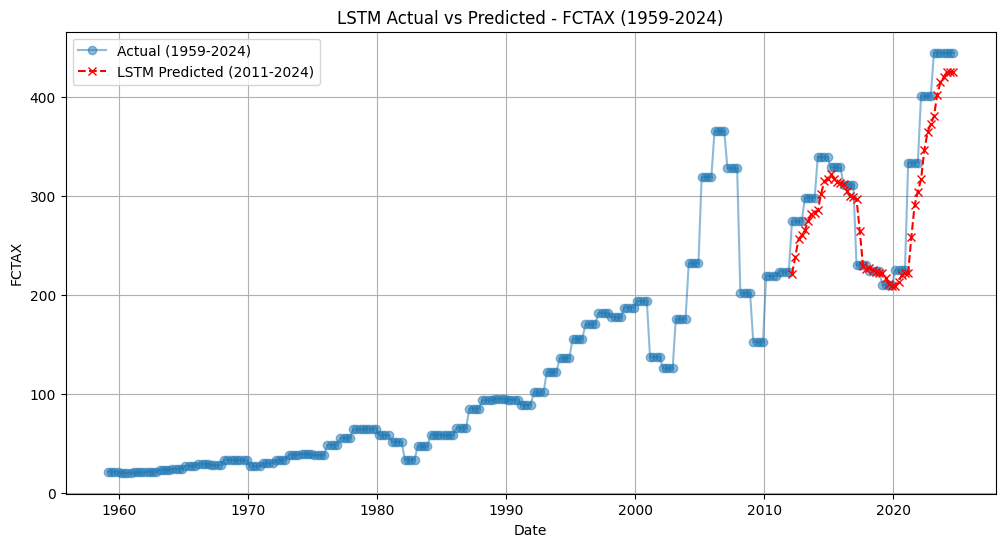

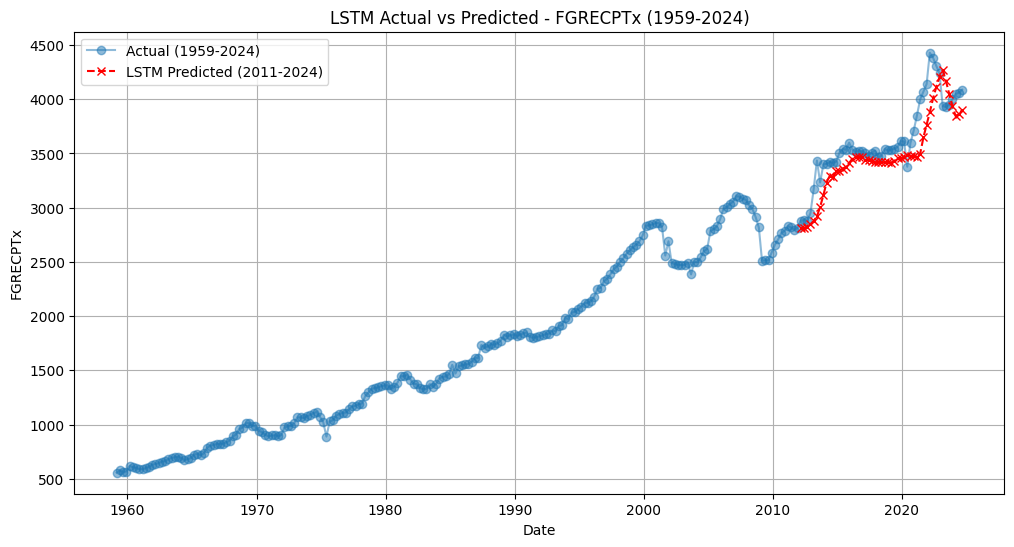

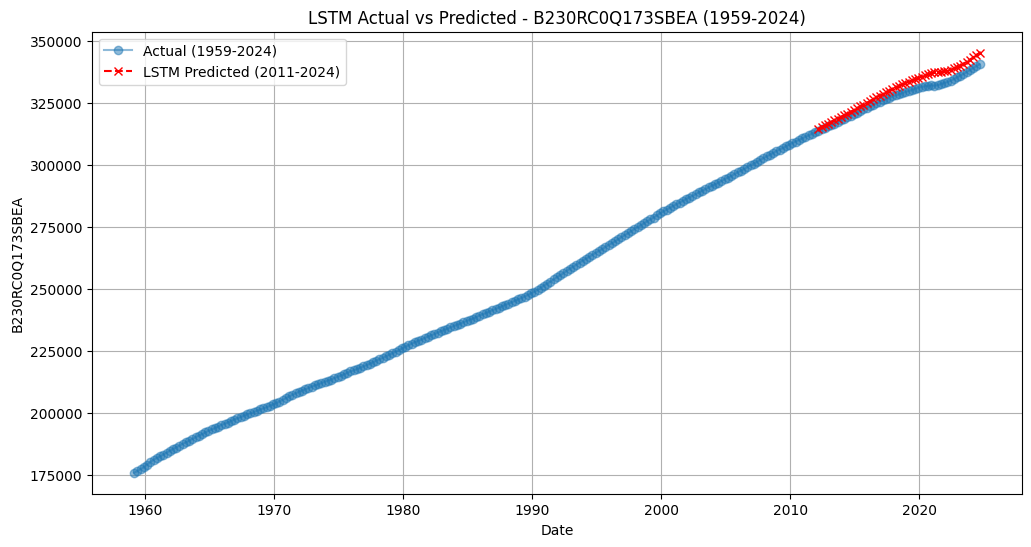

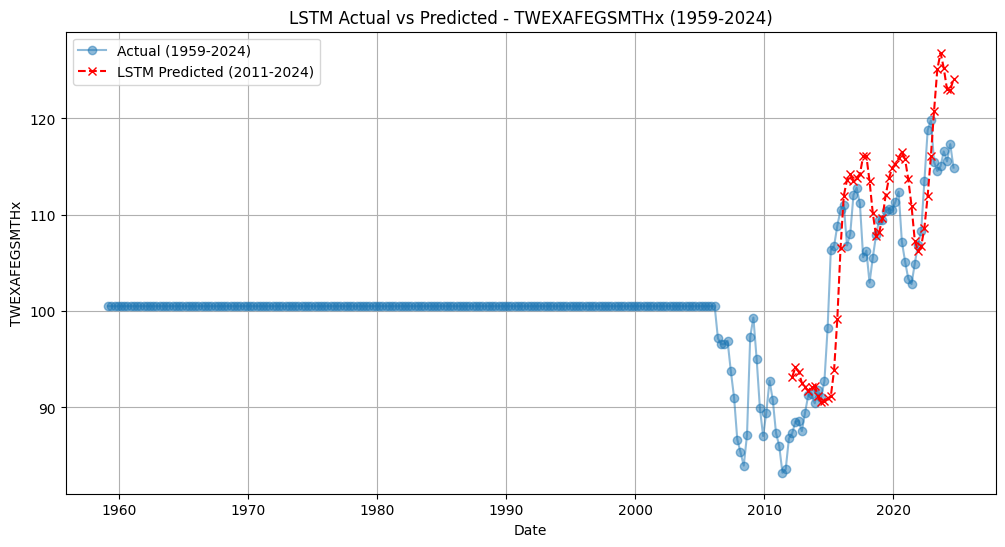

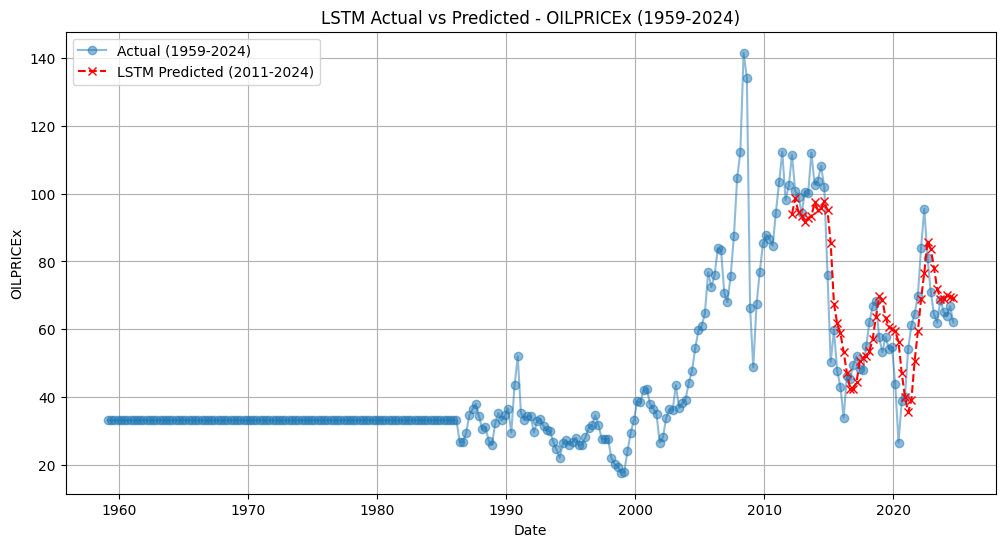

In [22]:
# Step 1: Load the dataset again
df = pd.read_csv("output.csv")

# Ensure 'sasdate' is in datetime format and set it as the index
df["sasdate"] = pd.to_datetime(df["sasdate"])
df.set_index("sasdate", inplace=True)

# Define the variables to predict
variables = [
    "CPIAUCSL", "UMCSENTx", "FEDFUNDS", "DPIC96", "UNRATE", "BCIUSA",
    "BUSLOANSx", "USEPUINDXM", "CNCFx", "FCTAX", "FGRECPTx",
    "B230RC0Q173SBEA", "TWEXAFEGSMTHx", "OILPRICEx"
]

# Step 2: Normalize the data
from sklearn.preprocessing import MinMaxScaler

scalers = {}
df_scaled = df.copy()
for var in variables:
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_scaled[var] = scaler.fit_transform(df[[var]])
    scalers[var] = scaler  # Store the scaler for inverse transformation

# Step 3: Split the data into training and testing sets
train_df = df_scaled.loc[:'2010-12-01']
test_df = df_scaled.loc['2011-03-01':]

# Step 4: Define sequence length for LSTM
seq_length = 4  # Using last 4 quarters to predict the next quarter

# Step 5: Function to create sequences for LSTM
import numpy as np

def create_sequences(data, seq_length=4):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Step 6: Train LSTM for each variable
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

predictions_lstm = {}
mape_scores_lstm = {}

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

for var in variables:
    # Prepare input data
    X_train, y_train = create_sequences(train_df[var].values, seq_length)
    X_test, y_test = create_sequences(test_df[var].values, seq_length)

    # Reshape for LSTM input (samples, timesteps, features)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Define LSTM model
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    # Make predictions
    y_pred = model.predict(X_test)

    # Inverse transform predictions
    y_pred_rescaled = scalers[var].inverse_transform(y_pred)
    y_test_rescaled = scalers[var].inverse_transform(y_test.reshape(-1, 1))

    # Store predictions and MAPE score
    predictions_lstm[var] = y_pred_rescaled.flatten()
    mape_scores_lstm[var] = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)

# Convert predictions to DataFrame
predictions_lstm_df = pd.DataFrame(predictions_lstm, index=test_df.index[seq_length:])

# Step 7: Display MAPE scores
mape_lstm_df = pd.DataFrame(mape_scores_lstm.items(), columns=["Variable", "MAPE (%)"])
print("\nLSTM MAPE Scores:\n", mape_lstm_df)

# Step 8: Display Predictions
print("\nLSTM Predictions:\n", predictions_lstm_df.head())

# Step 9: Plot actual vs predicted values
import matplotlib.pyplot as plt

for var in variables:
    plt.figure(figsize=(12, 6))

    # Plot actual values
    plt.plot(df.index, df[var], label="Actual (1959-2024)", marker='o', linestyle='-', alpha=0.5)

    # Plot LSTM predictions
    plt.plot(predictions_lstm_df.index, predictions_lstm_df[var], label="LSTM Predicted (2011-2024)", marker='x', linestyle='--', color='red')

    plt.xlabel("Date")
    plt.ylabel(var)
    plt.title(f"LSTM Actual vs Predicted - {var} (1959-2024)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [23]:
# Reload the dataset
df = pd.read_csv("output.csv")

# Ensure 'sasdate' is in datetime format and set it as the index
df["sasdate"] = pd.to_datetime(df["sasdate"])
df.set_index("sasdate", inplace=True)

# Define variables to predict
variables = [
    "CPIAUCSL", "UMCSENTx", "FEDFUNDS", "DPIC96", "UNRATE", "BCIUSA",
    "BUSLOANSx", "USEPUINDXM", "CNCFx", "FCTAX", "FGRECPTx",
    "B230RC0Q173SBEA", "TWEXAFEGSMTHx", "OILPRICEx"
]

# Forecasting range
future_dates = pd.date_range(start="2024-12-01", end="2025-12-01", freq="Q")

# Initialize storage for results
forecasts_lstm = pd.DataFrame(index=future_dates)

# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scalers = {}
df_scaled = df.copy()
for var in variables:
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_scaled[var] = scaler.fit_transform(df[[var]])
    scalers[var] = scaler  # Save the scaler for inverse transformation

# Define sequence length for LSTM
seq_length = 4  # Using last 4 quarters to predict the next quarter

# Function to create sequences for LSTM
import numpy as np

def create_sequences(data, seq_length=4):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Train LSTM and Forecast for Each Variable
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

for var in variables:
    print(f"Processing {var} using LSTM...")

    # Prepare input data
    X_train, y_train = create_sequences(df_scaled[var].values, seq_length)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    # Define LSTM model
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    # Forecasting using last sequence
    last_seq = X_train[-1].reshape(1, seq_length, 1)
    predictions = []
    for _ in range(len(future_dates)):
        pred = model.predict(last_seq)
        predictions.append(scalers[var].inverse_transform(pred)[0, 0])
        last_seq = np.roll(last_seq, -1, axis=1)
        last_seq[0, -1, 0] = pred[0, 0]

    forecasts_lstm[var] = predictions

# Display Forecast
print("\nFinal LSTM Forecasts (2024-12-01 to 2025-12-01):")
print(forecasts_lstm)

# Save to CSV
forecasts_lstm.to_csv("lstm_forecast_results.csv")

<ipython-input-23-91dff0707cbb>:16: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(start="2024-12-01", end="2025-12-01", freq="Q")
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Processing CPIAUCSL using LSTM...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processing UMCSENTx using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Processing FEDFUNDS using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing DPIC96 using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processing UNRATE using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing BCIUSA using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing BUSLOANSx using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processing USEPUINDXM using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing CNCFx using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing FCTAX using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing FGRECPTx using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Processing B230RC0Q173SBEA using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing TWEXAFEGSMTHx using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing OILPRICEx using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Final LSTM Forecasts (2024-12-01 to 2025-12-01):
              CPIAUCSL  UMCSENTx  FEDFUNDS        DPIC96    UNRATE  \
2024-12-31  317.666229       NaN  6.024565  17310.841797  4.059743   
2025-03-31  320.801331       NaN  6.460979  17421.607422  4.174824   
2025-06-30  324.480438       NaN  7.002022  17501.917969  4.288432   
2025-09-30  328.449921       NaN  7.490624  17496.890625  4.370636   

                BCIUSA    BUSLOANSx  USEPUINDXM        CNCFx       FCTAX  \
2024-12-31   99.670982  2352.884521  109.174057  2429.829102  461.982941   
2025-03-31  100.044533  2361.126465  108.013840  2459.281006  471.464844   
2025-06-30  100.350273  2374.631592  108.563965  2454.963135  484.009460   
2025-09-30  100.525452  2400.220703  108.231079  2489.550293  496.496460   

               FGRECPTx  B230RC0Q173SBEA  TWEXAFEGSMTHx  OILPRICE

In [24]:
# Define variables to predict
variables = [
    "CPIAUCSL", "UMCSENTx", "FEDFUNDS", "DPIC96", "UNRATE", "BCIUSA",
    "BUSLOANSx", "USEPUINDXM", "CNCFx", "FCTAX", "FGRECPTx",
    "B230RC0Q173SBEA", "TWEXAFEGSMTHx", "OILPRICEx"
]

# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scalers = {}
df_scaled = df.copy()
for var in variables:
    if var in df.columns:
        scaler = MinMaxScaler(feature_range=(0, 1))
        df_scaled[var] = scaler.fit_transform(df[[var]])
        scalers[var] = scaler  # Save the scaler for inverse transformation
    else:
        print(f"Warning: {var} is missing from the dataset.")

# Define sequence length for LSTM
seq_length = 4  # Using last 4 quarters to predict the next quarter

# Function to create sequences for LSTM
import numpy as np

def create_sequences(data, seq_length=4):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Train LSTM and Forecast for Each Variable
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Forecasting range
future_dates = pd.date_range(start="2024-12-01", end="2025-12-01", freq="Q")

# Initialize storage for results
forecasts_lstm = pd.DataFrame(index=future_dates)

for var in variables:
    if var not in df.columns:
        print(f"Skipping {var}, as it is missing from the dataset.")
        continue

    print(f"Processing {var} using LSTM...")

    # Prepare input data
    X_train, y_train = create_sequences(df_scaled[var].values, seq_length)
    if len(X_train) == 0:  # Skip if not enough data
        print(f"Skipping {var}, insufficient data for LSTM training.")
        continue

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    # Define LSTM model
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    # Forecasting using last sequence
    last_seq = X_train[-1].reshape(1, seq_length, 1)
    predictions = []
    for _ in range(len(future_dates)):
        pred = model.predict(last_seq)
        predictions.append(scalers[var].inverse_transform(pred)[0, 0])
        last_seq = np.roll(last_seq, -1, axis=1)
        last_seq[0, -1, 0] = pred[0, 0]

    forecasts_lstm[var] = predictions

# Save LSTM Forecasts
forecasts_lstm.to_csv("lstm_fixed_forecast_results.csv")

<ipython-input-24-58636bf5745a>:40: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(start="2024-12-01", end="2025-12-01", freq="Q")
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Processing CPIAUCSL using LSTM...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing UMCSENTx using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing FEDFUNDS using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing DPIC96 using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Processing UNRATE using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing BCIUSA using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing BUSLOANSx using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing USEPUINDXM using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing CNCFx using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Processing FCTAX using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processing FGRECPTx using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Processing B230RC0Q173SBEA using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Processing TWEXAFEGSMTHx using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing OILPRICEx using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [25]:
# Check for missing values in UMCSENTx
missing_umcsentx = df["UMCSENTx"].isna().sum()

if missing_umcsentx > 0:
    print(f"⚠️ UMCSENTx has {missing_umcsentx} missing values. Applying forward-fill...")
    df["UMCSENTx"].fillna(method="bfill", inplace=True)
else:
    print("✅ UMCSENTx has no missing values.")

# Normalize the data again
scalers = {}
df_scaled = df.copy()
for var in variables:
    if var in df.columns:
        scaler = MinMaxScaler(feature_range=(0, 1))
        df_scaled[var] = scaler.fit_transform(df[[var]])
        scalers[var] = scaler  # Save the scaler for inverse transformation
    else:
        print(f"Warning: {var} is missing from the dataset.")

# Train LSTM again for UMCSENTx
seq_length = 4

# Prepare input data
X_train, y_train = create_sequences(df_scaled["UMCSENTx"].values, seq_length)

if len(X_train) > 0:
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    # Define LSTM model
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    # Forecasting using last sequence
    last_seq = X_train[-1].reshape(1, seq_length, 1)
    predictions = []
    for _ in range(len(future_dates)):
        pred = model.predict(last_seq)
        predictions.append(scalers["UMCSENTx"].inverse_transform(pred)[0, 0])
        last_seq = np.roll(last_seq, -1, axis=1)
        last_seq[0, -1, 0] = pred[0, 0]

    forecasts_lstm["UMCSENTx"] = predictions
    print("✅ UMCSENTx successfully forecasted using LSTM.")

else:
    print("❌ Insufficient data for LSTM training on UMCSENTx.")

# Save the updated LSTM forecast
forecasts_lstm.to_csv("lstm_fixed_forecast_results_updaed.csv")

⚠️ UMCSENTx has 2 missing values. Applying forward-fill...


<ipython-input-25-497cde610d23>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["UMCSENTx"].fillna(method="bfill", inplace=True)
<ipython-input-25-497cde610d23>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["UMCSENTx"].fillna(method="bfill", inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models,

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
✅ UMCSENTx successfully forecasted using LSTM.


In [27]:

# Compute modeled values based on provided equations

# Real Personal Consumption Expenditures (PCECC96)
df["modelled_C"] = (
    -86.3768
    - 0.2693 * df["CPIAUCSL"]
    + 0.3714 * df["UMCSENTx"]
    - 12.6662 * df["FEDFUNDS"]
    + 0.9454 * df["DPIC96"]
    - 33.7899 * df["UNRATE"]
)

# Gross Private Domestic Investment (GPDIC1)
df["modelled_I"] = (
    -2376.5183
    - 6.5268 * df["FEDFUNDS"]
    + 27.3416 * df["BCIUSA"]
    + 0.6589 * df["BUSLOANSx"]
    - 2.6307 * df["USEPUINDXM"]
    + 0.4904 * df["CNCFx"]
    + 3.5216 * df["FCTAX"]
)

# Government Expenditure (GCEC1)
df["modelled_G"] = (
    -1492.3675
    - 0.0275 * df["FGRECPTx"]
    + 1.6008 * df["CPIAUCSL"]
    - 11.5136 * df["FEDFUNDS"]
    + 0.0152 * df["B230RC0Q173SBEA"]
)

# Net Exports (NETEXP)
df["modelled_XM"] = (
    975.1490
    - 13.2294 * df["TWEXAFEGSMTHx"]
    - 54.6541 * df["FEDFUNDS"]
    - 1.4820 * df["OILPRICEx"]
)

# Compute GDP using modeled components
df["modelled_GDP"] = (
    -3490.1987
    + 1.3605 * df["modelled_C"]
    + 0.0847 * df["modelled_I"]
    + 0.3093 * df["modelled_G"]
    - 8.3348 * df["modelled_XM"]
)

# Save the updated file
updated_file_path = "lstm_fixed_forecast_results_updated_with_models.csv"
df.to_csv(updated_file_path, index=False)

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("output.csv")  # Replace with actual file path

targets = [
    "A014RE1Q156NBEA", "A823RL1Q225SBEA", "IPNMAT", "IPNCONGD",
    "CUMFNS", "USGOOD", "USCONS", "USINFO", "USMINE", "USWTRADE"
]

def preprocess_data(df, target_columns, seq_length=4):
    scaler = MinMaxScaler()
    df_scaled = scaler.fit_transform(df[target_columns])

    X, y = [], []
    for i in range(len(df_scaled) - seq_length):
        X.append(df_scaled[i:i + seq_length])
        y.append(df_scaled[i + seq_length])

    return np.array(X), np.array(y), scaler

# Prepare data
seq_length = 4
X, y, scaler = preprocess_data(df, targets, seq_length)

# Split into train/test sets
split_idx = int(0.8 * len(X))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, len(targets))),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(len(targets))
])

model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Generate future predictions
future_X = X[-1].reshape(1, seq_length, len(targets))
future_predictions = model.predict(future_X)

# Convert predictions back to original scale
predicted_values = scaler.inverse_transform(future_predictions)

# Append results to dataframe
future_dates = ["2024-12-01", "2025-03-01", "2025-06-01", "2025-09-01", "2025-12-01"]
future_df = pd.DataFrame(predicted_values, columns=targets)
future_df.insert(0, "Date", future_dates[:len(future_df)])

df = pd.concat([df, future_df], ignore_index=True)

# Save updated file
df.to_csv("lstm_forecast_results.csv", index=False)
print("Forecast saved as lstm2_forecast_results.csv")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2656 - val_loss: 0.1360
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0678 - val_loss: 0.0428
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0285 - val_loss: 0.0319
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0205 - val_loss: 0.0181
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0167 - val_loss: 0.0157
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0133 - val_loss: 0.0145
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0105 - val_loss: 0.0176
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0104 - val_loss: 0.0157
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0099 - val_loss: 0.0125
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0092 - val_loss: 0.0125
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0084 - val_loss: 0.0130
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0085 - val_loss: 

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("Quarterly Data.csv")  # Replace with actual file path

targets = [
    "A014RE1Q156NBEA", "A823RL1Q225SBEA", "IPNMAT", "IPNCONGD",
    "CUMFNS", "USGOOD", "USCONS", "USINFO", "USMINE", "USWTRADE"
]

def preprocess_data(df, target_columns, seq_length=4):
    scaler = MinMaxScaler()
    df_scaled = scaler.fit_transform(df[target_columns])
    X, y = [], []

    for i in range(len(df_scaled) - seq_length):
        X.append(df_scaled[i:i + seq_length])
        y.append(df_scaled[i + seq_length])

    return np.array(X), np.array(y), scaler

# Prepare data
seq_length = 4
X, y, scaler = preprocess_data(df, targets, seq_length)

# Split into train/test sets
split_idx = int(0.8 * len(X))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, len(targets))),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(len(targets))
])

model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Generate future predictions
future_X = X[-1].reshape(1, seq_length, len(targets))
future_predictions = model.predict(future_X)

# Convert predictions back to original scale
predicted_values = scaler.inverse_transform(future_predictions)

# Append results to dataframe
future_dates = ["2025-03-01", "2025-06-01", "2025-09-01", "2025-12-01"]
future_df = pd.DataFrame(predicted_values, columns=targets)
future_df.insert(0, "Date", future_dates[:len(future_df)])

df = pd.concat([df, future_df], ignore_index=True)

# Save updated file
df.to_csv("lstm_forecast_results.csv", index=False)
print("Forecast saved as lstm_forecast_results.csv")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.4684 - val_loss: 0.4071
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3069 - val_loss: 0.0909
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0609 - val_loss: 0.0137
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0146 - val_loss: 0.0140
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - val_loss: 0.0104
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0086 - val_loss: 0.0100
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0082 - val_loss: 0.0109
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - val_loss: 0.0090
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0074 - val_loss: 0.0090
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0071 - val_loss: 0.0084
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0074 - va

In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("output.csv")

# Ensure 'sasdate' is in datetime format and set it as the index
df["sasdate"] = pd.to_datetime(df["sasdate"])
df.set_index("sasdate", inplace=True)

# Define variables of interest
variables = [
    "A014RE1Q156NBEA", "A823RL1Q225SBEA", "IPNMAT", "IPNCONGD",
    "CUMFNS", "USGOOD", "USCONS", "USINFO", "USMINE", "USWTRADE"
]

# Forecasting range (4 future quarters)
future_dates = pd.date_range(start="2025-03-01", periods=4, freq="Q")

# Initialize storage for results
forecasts_lstm = pd.DataFrame(index=future_dates)

# Normalize the data
scalers = {}
df_scaled = df.copy()
for var in variables:
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_scaled[var] = scaler.fit_transform(df[[var]])
    scalers[var] = scaler  # Save the scaler for inverse transformation

# Define sequence length for LSTM
seq_length = 4  # Using last 4 quarters to predict the next quarter

# Function to create sequences for LSTM
def create_sequences(data, seq_length=4):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Train LSTM and Forecast for Each Variable
for var in variables:
    print(f"Processing {var} using LSTM...")

    # Prepare input data
    X_train, y_train = create_sequences(df_scaled[var].values, seq_length)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    # Define LSTM model
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    # Forecasting using last sequence
    last_seq = X_train[-1].reshape(1, seq_length, 1)
    predictions = []
    for _ in range(len(future_dates)):
        pred = model.predict(last_seq)
        predictions.append(scalers[var].inverse_transform(pred)[0, 0])
        last_seq = np.roll(last_seq, -1, axis=1)
        last_seq[0, -1, 0] = pred[0, 0]

    forecasts_lstm[var] = predictions

# Display Forecast
print("\nFinal LSTM Forecasts (Next 4 Quarters):")
print(forecasts_lstm)

# Save to CSV
forecasts_lstm.to_csv("lstm_forecast_selected_vars.csv")
print("Forecast saved as lstm_forecast_selected_vars.csv")


<ipython-input-29-a623830a67ad>:22: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(start="2025-03-01", periods=4, freq="Q")
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Processing A014RE1Q156NBEA using LSTM...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Processing A823RL1Q225SBEA using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing IPNMAT using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Processing IPNCONGD using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Processing CUMFNS using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing USGOOD using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Processing USCONS using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing USINFO using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Processing USMINE using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Processing USWTRADE using LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Final LSTM Forecasts (Next 4 Quarters):
            A014RE1Q156NBEA  A823RL1Q225SBEA     IPNMAT    IPNCONGD  \
2025-03-31         0.151967         1.316174  97.161057  101.024361   
2025-06-30         0.151156         0.569362  97.290321  101.039444   
2025-09-30         0.158620         0.923463  97.539780  101.073128   
2025-12-31         0.117890         1.299218  98.064980  101.383087   

               CUMFNS        USGOOD       USCONS       USINFO      USMINE  \
2025-03-31  77.376694  21806.675781  8378.535156  3003.806641  648.455139   
2025-06-30  77.649315  21813.074219  8465.921875  3003.205078  651.208496   
2025-09-30  78.023788  21790.476562  8562.825195  3004.694092  658.396606   
2025-12-31  78.377319  21774.101562  8671.344727  3001.439941  665.027710   

               USWTRADE  
2025-03-31  6125.760254  
2025-06-30  